<H1><center><font color='limegreen'>Bank Marketing Campaign Analysis</font>
<br>----------

<H3><font color='limegreen'>By : Group Delta</font>
<br>- Fathur Rizky Maulana
<br>- Alfian Abdul Ghaffar
<br>- Dafiq Alfaiz
<br>-------------------------

# **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding and Data Preparation
3. Exploratory Data Analysis
4. Data Preprocessing
5. Modeling and Hyperparameter Tuning
6. Probability and Financial Analysis
7. Conclusion and Recommendation

----
----

## **`0. Initial Setup`**

In [56]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Membuat grafik
import seaborn as sns #Membuat grafik
import missingno as msno #Cek missing value

# statistics
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import f1_score, recall_score, fbeta_score, make_scorer

import warnings
warnings.filterwarnings("ignore")

## **`1. Business Problem Understanding`**

### **1.1 Context**

[Term Deposit](https://www.forbes.com/advisor/au/personal-finance/guide-to-term-deposits-in-australia/) atau tabungan berjangka adalah jenis rekening tabungan yang memberikan suku bunga tetap selama jangka waktu tertentu, biasanya satu bulan hingga lima tahun. yang membedakan jenis tabungan ini dengan tabungan konvensional lainnya adalah bahwa pada Term Deposit, nasabah tidak diperbolehkan mengambil dana yang sudah di setor selama jangka waktu deposit, jika nasabah menarik dana nya sebelum waktu deposit, maka nasabah akan dikenai biaya.

Dalam dunia perbankan, deposit memiliki peran penting bagi pertumbuhan industri perbankan. Bank membutuhkan dana yang disetorkan nasabah (Term Deposit) sebagai sumber dana yang dapat digunakan untuk memberikan pinjaman kepada nasabah lain dan menginvestasikan dana tersebut kepada calon investor. Dana deposit juga membantu bank dalam menjaga likuiditas dan stabilitas keuangan dari perusahaan bank tersebut. Sehingga bank harus terus meningkatkan jumlah nasabah yang menggunakan produk term deposit yang ditawarkan sehingga pada akhirnya akan memberikan manfaat jangka panjang dalam mendukung pertumbuhan dan kestabilitasan keuangan bank.

### **1.2 Problem Statement**

Proses menarik nasabah untuk mau menggunakan/ berlangganan produk Term Deposit memerlukan waktu dan sumber daya yang besar jika perusahaan melakukan usaha campaign tersebut kepada semua nasabah. Terlebih menurut [Brian Williams, Ph.D](https://blog.thebrevetgroup.com/21-mind-blowing-sales-stats), rata-rata sales menghubungi calon nasabah sebanyak lima kali agar calon nasabah tertarik menggunakan produk yang kita tawarkan. Sehingga perusahaan ingin meningkatkan efisiensi marketing campaign dengan memfokuskan campaign berikutnya kepada calon nasabah yang memiliki peluang untuk menggunakan produk Term Deposit berdasarkan karakteristik nasabah yang telah menggunakan produk Term Deposit.

### **1.3 Project Stakeholders:**

Pihak stakeholders yang terlibat dan yang akan menggunakan model dari analisis ini adalah:
* ***Sales & Marketing Team***: Tim ini akan bertanggung jawab dalam mengembangkan dan merencanakan usaha marketing serta mengimplementasikan kepada pelanggan secara tepat dalam upaya memaksimalkan pendapatan perusahaan.
* ***Operations Team***: Tim ini akan bertanggung jawab dalam mengkoordinasikan serta mengurus rincian operasi, mengevaluasi gambaran besar operasi, dan memastikan bahwa area bisnis berjalan semulus dan seefektif mungkin.
* ***Finance Team***: Tim ini akan bertanggung jawab dalam mengatur keuangan perusahaan yang diakibatkan oleh usaha marketing.

Ketiga peran diatas memiliki tujuan yang sama yaitu memaksimalkan pendapatan perusahaan dari nasabah yang akan menggunakan produk term deposit dengan tepat

### **1.4 Goals**

Berdasarkan Problem Statement diatas, perusahaan ingin memiliki kemampuan untuk dapat memprediksi nasabah mana yang memiliki potensi untuk mau menggunakan/ berlangganan produk Term Deposit pada campaign berikutnya, sehingga tim marketing dapat lebih memfokuskan campaign berikutnya kepada calon nasabah yang terprediksi akan menggunakan produk Term Deposit berdasarkan karakteristik dari nasabah yang menggunakan/ berlangganan Term Deposit pada campaign sebelumnya.

Selain itu, untuk meningkatkan pelayanan dan performa dari bank itu sendiri, perusahaan juga ingin mengetahui faktor atau variabel apa yang membuat nasabah mau menggunakan atau berlangganan Term Deposit. Sehingga perusahaan dalam hal ini akan membuat perencanaan yang lebih baik lagi dalam mendekati calon nasabah yang potensial (nasabah yang ingin membuka Term Deposit)

### **1.5 Analytic Approach**

Dalam hal ini, kita akan menganalisis data untuk mencari pola yang bisa membedakan antara kategori nasabah yang ingin membuka Term Deposito atau tidak. Selain itu, kita juga akan membangun model klasifikasi yang akan membantu stakeholders untuk memprediksi probabilitas nasabah ingin membuka Term Deposit atau tidak. 

### **1.6 Metric Evaluation**

Karena kita akan memfokuskan pada nasabah yang berminat untuk mengajukan ***Term Deposit***, maka target yang kita tetapkan adalah sebagai berikut:

**Target**:   
`yes` : Nasabah Yang Menggunakan ***Term Deposit*** (Positive)
<br>
`no` : Nasabah Yang Tidak Menggunakan ***Term Deposit*** (Negative)

**Metric Evaluation**:

|                                | ***Tidak Term Deposit*-`Pred`** | ***Term Deposit*-`Pred`** |
| ------------------------------ | ------------------------------- | ------------------------- |
| ***Tidak Term Deposit*-`Act`** |               TN                |             FP            |
| ***Term Deposit*-`Act`**       |               FN                |             TP            |

**`Type 1 Error`** : **False Positive**
<br>
`Interpretasi`: Nasabah yang aktualnya tidak Menggunakan *Term Deposit*, tapi terprediksi sebagai Nasabah yang Menggunakan *Term Deposit* 
<br>
`Konsekuensi`: 
* Bank akan mengeluarkan biaya yang sia-sia, karena Bank akan menghabiskan biaya untuk melakukan campaign kepada calon nasabah yang tidak akan Menggunakan *Term Deposit*
* Rincian biaya yang dikeluarkan untuk biaya marketing per orang: ([CPM]())
    * Budget marketing untuk deposito: 1% - 3% dari revenue ([sumber](https://emiboston.com/leading-u-s-banks-boosted-marketing-spend-in-2022/))
    * Minimal pembukaan rekening deposito CDs: $1,000 / 955.35 EUR (kurs $1 = 0.96EUR) ([Certificate of Deposit](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/))
    * Jumlah Nasabah: 41,188 ([*Sumber dari dataset*](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset))
        * Nasabah menggunakan Term Deposit: 4,640
        * Nasabah tidak menggunakan Term Deposit: 36,548
    * Kita akan menghitung budget marketing untuk melakukan Term Deposit Campaign
    $$ Marketing Budget = {(Nasabah\ menggunakan\ Term\ Deposit\times Min\ Opening\ Deposit)\times Budget\ marketing\ untuk\ deposito} $$ 
    $$ Marketing Budget = {(4,640\times 955.35\ EUR)\times 3\%} $$ 
    $$ Marketing Budget = {132,984.72\ EUR} $$ 
    *Marketing budget untuk campaign Term Deposit sebelumnya adalah 132,984.72 EUR, selanjutnya kita akan menghitung biaya campaign untuk per nasabahnya, sebagai berikut:* 
    $$ CPM =  \frac {Marketing\ Budget}{Total\ Customers} $$
    $$ CPM =  \frac {132,984.72\ EUR}{41,188} $$
    $$ CPM =  3.23\ EUR $$

*Dari hasil CPM diatas bisa dikatakan Bank akan mengeluarkan biaya marketing sebesar 3.23 Euro per nasabah. Sehingga ketika bank salah memutuskan/ melabeli nasabah yang ingin membuka Term Deposit dan ternyata tidak ingin membuka Term Deposit, maka bank akan mengeluarkan biaya marketing sebesar 3.23 Euro per nasabah secara sia-sia.*

**`Type 2 Error`** : **False Negative**
<br>
`Interpretasi`: Nasabah yang aktualnya Menggunakan *Term Deposit*, tapi terprediksi sebagai Nasabah yang tidak Menggunakan *Term Deposit*
<br>
`Konsekuensi`: 
* Bank akan kehilangan potensi keunutungan dari nasabah yang berpotensi akan Menggunakan *Term Deposit*.
* Rincian potensi keuntungan per nasabah:
    * Suku bunga pinjaman: 0.25% ([Portugal Interest Rate, June 2014](https://tradingeconomics.com/portugal/interest-rate))
    * Suku bunga deposito: 5.59% ([Portugal Bank Lending Rate, June 2014](https://tradingeconomics.com/portugal/bank-lending-rate))
    * Minimal pembukaan rekening deposito CDs: $1,000 / 955.35 EUR (kurs $1 = 0.96EUR) ([Certificate of Deposit](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/))
    $$ Profit =  {(Lending\ Rate\ -\ Deposit\ Interest\ Rate)\times Minimum\ Opening\ Deposit} $$
    $$ Profit =  {(5.59\% \ -\ 0.25\%)\times 955.35\ EUR} $$
    $$ Profit =  {51,02\ EUR} $$

*Dari hasil perhitungan profit diatas, bank akan berpotensi kehilangan keuntungan yang didapatkan dari setiap nasabah yang membuka rekening deposito sebesar 51,02 Euro per nasabah.*

Berdasarkan konsekuensi diatas, menurut langkah yang tepat untuk pemilihan model adalah model yang **sebanyak mungkin memprediksi `kelas positif yang benar` (*True Postive*)**, dan **sesedikit mungkin memprediksi `kelas positif yang salah` (*False Negative*)**. Jadi metrik utama yang akan digunakan adalah **PR-AUC** (*Precision-Recall Curve*). Matrik **PR-AUC** dipilih Dikarenakan kita lebih membutuhkan perhitungan `true positif` dibandingkan `true negatif` dan memiliki kelas yang `imbalance`, maka **PR-AUC** adalah metrik pengukuran yang tepat yakni kombinasi antara recall dan presisi berdasarkan treshold.

Alasan kami memilih AUC daripada Accuracy adalah karena,
seperti yang kita lihat dalam EDA, dataset yang kita gunakan adalah dataset yang imbalanced dengan kelas "no" sebagai kelas mayoritas. Jika kita menggunakan Accuracy sebagai metrik kita, model apa pun dapat memberikan Accuracy yang sangat baik. Tetapi pada akhirnya, itu akan menjadi model acak. AUC mengatasi masalah ini dengan melihat True Positive Rate (TPR) dan False Positif Rate (FPR). Hanya jika TPR dan FPR berada jauh di atas garis acak dalam kurva ROC, kita akan mendapatkan AUC yang baik. Accuracy tidak menjamin hal itu.


### **1.7 Data Dictionary**

Dataset dan deskripsi dapat di akses pada link berikut:
<br>
[Bank Marketing Campaign](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset)

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| `age` | Usia nasabah (`tahun`) |
| `job` | Jenis pekerjaan nasabah |
| `marital` | Status pernikahan nasabah |
| `education` | Level pendidikan nasabah. illiterate = buta huruf, basic.4y = pendidikan hingga usia 9 tahun, basic.6y = hingga usia 11 tahun, basic.9y = hingga usia 14 tahun, highschool = pendidikan hingga usia 17 tahun, professional.course = kelas pelatihan kejuruan, university.degree = pendidikan tingkat universitas |
| `default` | Apakah memiliki riwayat kredit macet |
| `housing` | Apakah memiliki pinjaman dana untuk rumah |
| `loan` | Apakah memiliki pinjaman dana untuk pribadi |
| `contact` | Tipe device yang digunakan untuk berkomunikasi |
| `month` | Bulan dimana terakhir kali nasabah dihubungi |
| `day_of_week` | Hari dimana terakhir kali nasabah dihubungi |
| `duration` | Lama waktu ketika dihubungi (`detik`) |
| `campaign` | Jumlah kontak yang dilakukan selama campaign |
| `pdays` | Jumlah hari setelah terakhir kali dihubungi. "999" menandakan nasabah belum pernah dihubungi sebelumnya |
| `previous` | Jumlah kontak yang dilakukan sebelum campaign |
| `poutcome` | Hasil dari campaign sebelumnya |
| `emp.var.rate` | Tingkat variasi lapangan kerja: Varians penambahan atau pengurangan tenaga kerja (dalam %) karena perubahan kondisi ekonomi pada negara Portugal |
| `cons.price.idx` | Indeks harga konsumen: Indikator untuk menilai perubahan rata-rata harga suatu barang dan jasa (indikator inflasi) pada negara Portugal |
| `cons.conf.idx` | Indeks kepercayaan konsumen: Indikator untuk menilai kinerja perekonomian melalui tingkat konsumsi masyarakat pada negara Portugal |
| `euribor3m` | Tingkat suku bunga 3 bulan terakhir |
| `nr.employed` | Indeks tenaga kerja pada negara Porugal |
| `y` | Status nasabah menggunakan Term Deposit atau tidak |

**`y`** == `Yes` : Nasabah berlangganan Term Deposit, `No` : Nasabah tidak berlangganan Term Deposit
<br>

### **1.8 Import File**

In [3]:
# Import file CSV

df = pd.read_csv("D:\Purwadhika JCDS\Capstone Project\Final Project\data\\raw\\bank-additional-full.csv", sep=";")

print(f'Data ini memiliki jumlah baris dan kolom: {df.shape}')
df.sample(10)


Data ini memiliki jumlah baris dan kolom: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2014,59,retired,married,university.degree,unknown,no,no,telephone,may,mon,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
22925,35,technician,married,university.degree,no,yes,no,cellular,aug,mon,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
19600,42,management,married,university.degree,unknown,yes,no,cellular,aug,thu,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
23348,53,blue-collar,married,unknown,no,yes,no,cellular,aug,wed,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
9943,40,technician,married,basic.9y,no,no,no,telephone,jun,wed,...,6,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4736,53,entrepreneur,single,basic.9y,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
20637,32,technician,single,university.degree,no,yes,yes,cellular,aug,wed,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
1299,42,admin.,married,university.degree,unknown,yes,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
20823,59,blue-collar,married,basic.4y,unknown,no,no,cellular,aug,wed,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
10202,38,admin.,married,university.degree,no,no,no,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no


## **`2. Data Understanding and Data Preparation`**

### **2.1 Initial Assessment**

Pertama kita akan mengecek dataset secara umum, dengan melihat informasi untuk setiap fitur-fiturnya meliputi tipe data, jumlah baris, jumlah missing value, jumlah persen missing value, jumlah unique value, dan nilai dari unique value dari fitur tersebut.

In [4]:
# Check karakteristik dataset

InitialAss = pd.DataFrame(
        {
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'total_row': df.isna().count().values,
        'total_null': df.isna().sum().values,
        '%null_value': df.isna().mean().values * 100,
        'n_unique': df.nunique().values,
        'unique_value': [df[col].unique() for col in df.columns]
        }
    )
pd.set_option('max_colwidth', None)
InitialAss

,feature,data_type,total_row,total_null,%null_value,n_unique,unique_value
0,age,int64,41188,0,0.0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,object,41188,0,0.0,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,object,41188,0,0.0,4,"[married, single, divorced, unknown]"
3,education,object,41188,0,0.0,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,object,41188,0,0.0,3,"[no, unknown, yes]"
5,housing,object,41188,0,0.0,3,"[no, yes, unknown]"
6,loan,object,41188,0,0.0,3,"[no, yes, unknown]"
7,contact,object,41188,0,0.0,2,"[telephone, cellular]"
8,month,object,41188,0,0.0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,object,41188,0,0.0,5,"[mon, tue, wed, thu, fri]"


__Insight :__
<br>

* Numerical Variable:
<br>
    - `Discrete` : age, campaign, pdays, previous
<br>
    - `Continue` : duration, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
* Categorical variable:
<br>
    - `Nominal` : job, marital, default, housing, loan, contact, month, day_of_week, poutcome, y
<br>
    - `Ordinal` : education
* Terdapat **`41.188 baris`** dan **`21 kolom`** dengan kolom **"`y`" sebagai target** pada dataset
* Tipe data untuk setiap variabel sudah sesuai
* Pada fitur **`job`**, **`marital`**, **`education`**, **`default`**, **`housing`**, dan **`loan`** terdapat kategori "**unknown**". Hal ini bisa saja merupakan bagian dari missing value (*analisis lebih lanjut*)
* Pada fitur **`month`** tidak ada bulan **januari** dan **februari**, artinya bank tidak melakukan campaign pada bulan tersebut. Hal ini dapat menjadi batasan dalam pembuatan machine learning

### **2.2 Descriptive Statistics**

Lalu kita akan coba melihat statistik deskriptif sederhana dari dataset ini

In [5]:
# Deskriptif statistik

display(
    # numerical variable
    df.describe(),
    # categorical variable
    df.describe(include='object')
)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


__Insight :__
* Fitur **`age`**
    * Nasabah dalam dataset ini memiliki usia **minimal 17 tahun** dan **maksimal 98 tahun** dengan usia **rata-rata 40.02 tahun**
    * Model machine learning yang akan dibuat mungkin akan bekerja pada range usia 17-98 tahun
* Fitur **`duration`**
    * Pesebaran nilai cukup besar, ditunjukan dari nilai **standar deviasi 259.28**
    * Waktu yang dibutuhkan untuk menghubungi nasabah ialah dari **range 0 detik (tidak dihubungi) hingga 4,918 detik (82 menit)** #akan dianalisis kembali untuk durasi max ini
    * Waktu yang digunakan untuk menghubungi nasabah ialah **rata-rata 258.28 detik (4.3 menit)**
* Fitur **`campaign`** (Jumlah kontak yang dilakukan selama campaign)
    * Jumlah kontak yang dilakukan tim sales & marketing ialah **rata-rata 2.5 kali**
    * Beberapa kasus membutuhkan hingga lebih dari **3 kali** kontak dengan nasabah
* Fitur **`pdays`** ()
    * Pesebaran nilai cukup besar, ditunjukan dari nilai **standar deviasi 186.91**
    * kategori "**999**" menandakan bahwa nasabah belum pernah dihubungi sebelumnya
* Pesebaran nilai pada fitur **`nr.employed`** cukup besar, ditunjukan dari nilai standar deviasi yaitu 72.25
* Pada fitur **`job`**, pekerjaan yang paling banyak ditawari deposit adalah **admin** dengan 25.3% dari total data
* Pada fitur **`marital`**, status pernikahan yang paling banyak ditawari deposit adalah **married** dengan 60.52% dari total data
* Pada fitur **`education`**, status pendidikan yang paling banyak ditawari deposit adalah **university.degree** dengan 29.54% dari total data
* Pada fitur **`default`**, status riwayat kredit macet yang paling banyak ditawari deposit adalah **nasabah yang tidak pernah memiliki kredit macet** dengan 79.12% dari total data
* Pada fitur **`housing`**, status pinjaman rumah yang paling banyak ditawari deposit adalah **nasabah yang memiliki pinjaman rumah** dengan 52.38% dari total data
* Pada fitur **`loan`**, status pemilikan pinjaman pribadi yang paling banyak ditawari deposit adalah **nasabah yang tidak memiliki pinjaman pribadi** dengan 82.42% dari total data
* Pada fitur **`contact`**, tipe kontak yang paling banyak ditawari deposit adalah **telepon seluler** dengan 63.47% dari total data
* Pada fitur **`month`**, bulan nasabah dikontak yang paling banyak ditawari deposit adalah pada bulan **mei** dengan 33.43% dari total data
* Pada fitur **`day_off_week`**, hari nasabah dikontak yang paling banyak ditawari deposit pada hari **kamis** dengan 20.93% dari total data
* Pada fitur **`poutcome`**, hasil dari kampanye sebelumnya yang paling banyak adalah **nonexistent** dengan 86.34% dari total data
* Pada fitur **`y`**, nasabah yang **menolak** deposit adalah yang terbanyak dengan 88.73% dari total data

### **2.3 Missing Value Check**, deteksi dan kuantifikasi missing value:

Text(0.5, 1.0, 'Cek Missing Value')

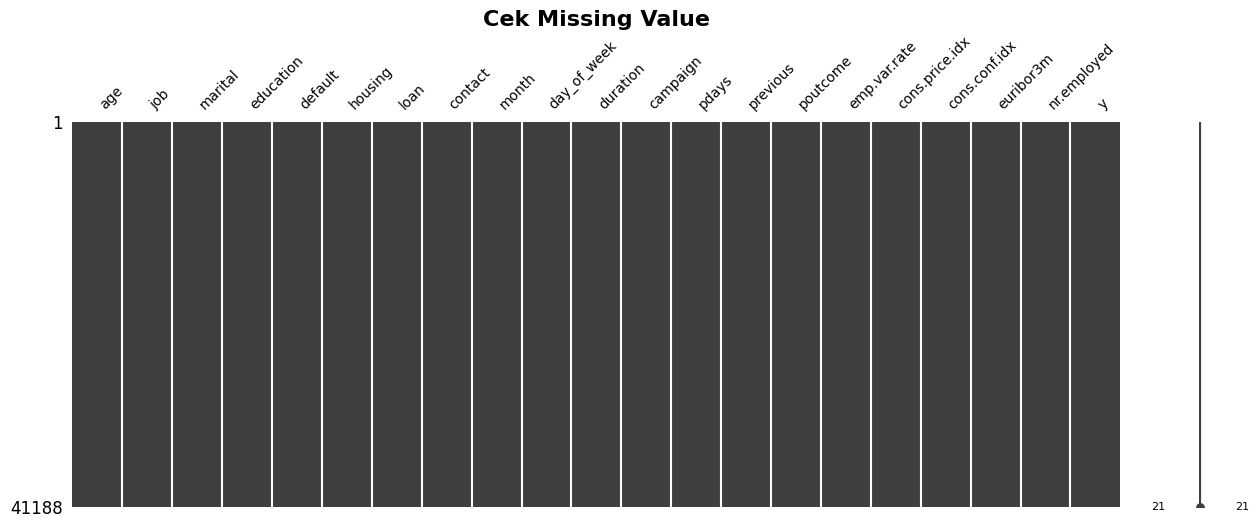

In [6]:
# Cek missing value

msno.matrix(df, figsize=(15,5), fontsize=10)
plt.title("Cek Missing Value", fontsize=16, weight="extra bold")

__Insight :__
* Dari matrix diatas memang **tidak ada missing value** pada dataset ini
* Dugaan awal missing value pada dataset ini ialah kategori "***unknown***"
* Pada tahap ini, tidak akan dilakukan treatment untuk kategori "***unknown***" untuk keperluan analisis EDA. Treatment akan dilakukan pada tahap ***Preprocessing***

### **2.4 Data Duplicated Check**, deteksi dan kuantifikasi duplikat data:

In [7]:
# Cek Data Duplikat

nDuplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)
print(f'Jumlah Data Duplikat: {nDuplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%')

Jumlah Data Duplikat: 12
Persentase Data Duplikat: 0.03%


__Insight:__
* Terdapat 12 data duplikat dari 41,188 baris data dengan persentase sebesar 0.03%
* Dari dataset yang disajikan tidak memiliki variabel tipe "**ID Data**", sehingga data duplikat dapat dianggap benar-benar duplikat
* Solution : Drop data duplikat tersebut

In [8]:
# Handling data duplicate

df.drop_duplicates(inplace=True)
nDuplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)

print(f"*** Handling data duplikat sudah dilakukan ***\n\nJumlah Data Duplikat: {nDuplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%")

*** Handling data duplikat sudah dilakukan ***

Jumlah Data Duplikat: 0
Persentase Data Duplikat: 0.0%


### **2.5 Data Preparation**, menyiapkan data agar mempermudah dalam proses analisa data

Untuk mempermudah dalam proses analisis data yang akan dilakukan dalam tahap EDA. Maka fitur `age` akan kita kelompokan menjadi beberapa kelompok usia. Berdasarkan data dari [UNCTAD, Handbook of Statistics 2022](https://hbs.unctad.org/age-structure/), struktur usia berdasarkan kelompok ekonomi dibagi menjadi kelompok usia 0-14, 15-24, 25-39, 40-64, 65-74, dan kelompok usia 75+

In [9]:
# Kelompokan fitur age menjadi beberapa kelompok usia

def rangeusia (age) :
    if 15 <= age <= 24 :
        return '15-24'
    elif 25 <= age <= 39 :
        return '25-39'
    elif 40 < age <= 64 :
        return '40-64'
    elif 65 < age <= 74 :
        return '65-74' 
    else :
        return '>75'

In [10]:
# Mengelompokan usia

df.insert(1,'age_range',df['age'].apply(rangeusia))
df

,age,age_range,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,40-64,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,40-64,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,25-39,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,>75,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,40-64,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,65-74,retired,married,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,40-64,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,40-64,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,40-64,technician,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### <font size="4.5">Setelah kita melakukan analisa pada tahap `Data Understanding and Data Preparation` diatas, **kita tidak membutuhkan file baru untuk menjawab pertanyaan diawal**. Selanjutnya kita akan masuk ke tahap `Exploratory Data Analysis (EDA)`</font>

## **`3. Exploratory Data Analysis (EDA)`**

Untuk mempermudah dalam analisis data, kita akan membagi fitur yang ada dalam dataset menjadi beberapa persoalan, sebagai berikut:
1. Analisis berdasarkan informasi personal nasabah (`age`, `job`, `marital`, `education`, `default`, `housing`, `loan`)
2. Analisis metode kontak yang dilakukan (`contact`, `month`, `day_of_week`, `duration`)
3. Analisis hasil campaign sebelumnya (`campaign`, `pdays`, `previous`, `poutcome`)
4. Analisis data ekonomi negara portugal (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.rmployed`)

### **3.1 Analisis Berdasarkan Informasi Personal Nasabah** (`age`, `job`, `marital`, `education`, `default`, `housing`, `loan`)

#### **3.1.1 Fitur `age`**

Kita akan cek pesebaran data untuk fitur `age`

<Figure size 1500x2000 with 0 Axes>

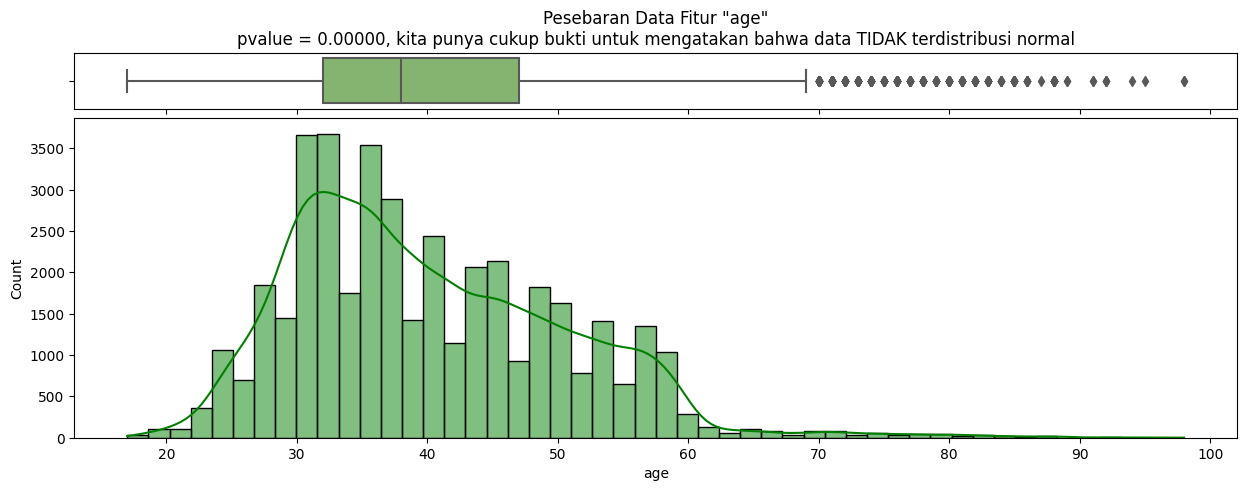

In [11]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["age"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "age"\n{distribusi}""", color = "black")
sns.boxplot(x = df["age"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["age"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kanan (Right-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai terendah-nya yaitu rentang usia 30-45 tahun 
* Nasabah yang paling banyak dihubungi ialah nasabah dengan range usia 30-45 tahun. Hal ini menandakan bank menargetkan calon nasabah dengan rentang usia tersebut dengan harapan usia tersebut meruakan usia yang dianggap sudah matang dari sisi finansial dan sedang dalam masa produktif-nya

Setelah kita mengetahui pesebaran data pada fitur `age`, selanjutnya kita akan coba melihat hubungan antar fitur `age_range` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok.

Maksud Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

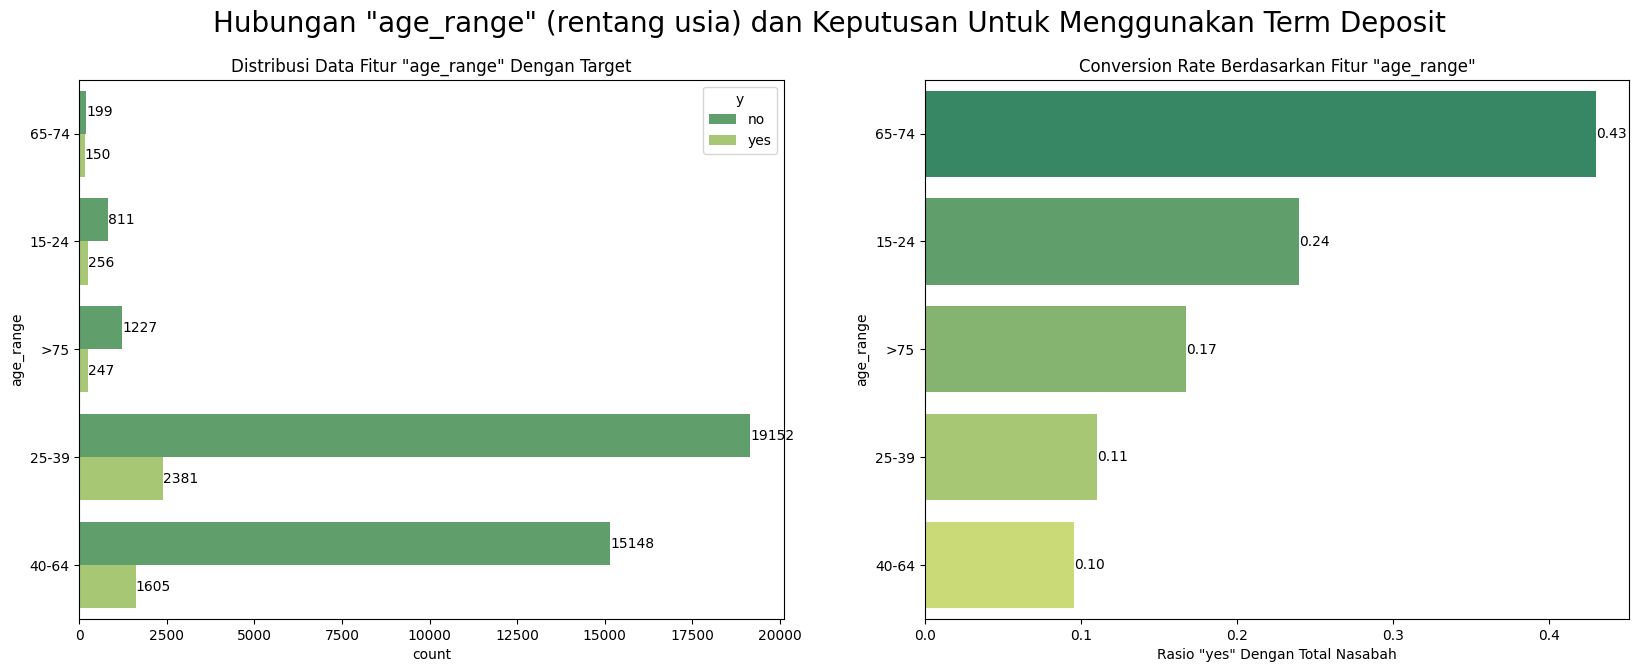

In [12]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "age_range" (rentang usia) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['age_range','age']].groupby(['age_range'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['age_range','age']].groupby(['age_range']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur age_range dengan Target
axes[0].set_title('Distribusi Data Fitur "age_range" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'age_range', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['age_range'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate 
plot2=sns.barplot(data=dfratio, y='age_range', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['age_range'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "age_range"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Berdasarkan grafik distribusi fitur `age_range` dengan target, Bank lebih banyak menawarkan produk Term Deposit kepada nasabah dengan kelompok usia 25-39 tahun dan 40-64 tahun (nasabah usia produktif)
* Pada grafik CVR berdasarkan kelompok usia, nasabah dengan kelompok usia 56-74 tahun, dan 15-24 tahun justru memiliki tingkat konversi yang tertinggi dibanding dengan kelompok usia produktif, dengan nilai CVR masing-masing kelompok usia adalah 0.43% dan 0.24%

#### **3.1.2 Fitur `job`**

Kita akan melihat hubungan antar fitur `job` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

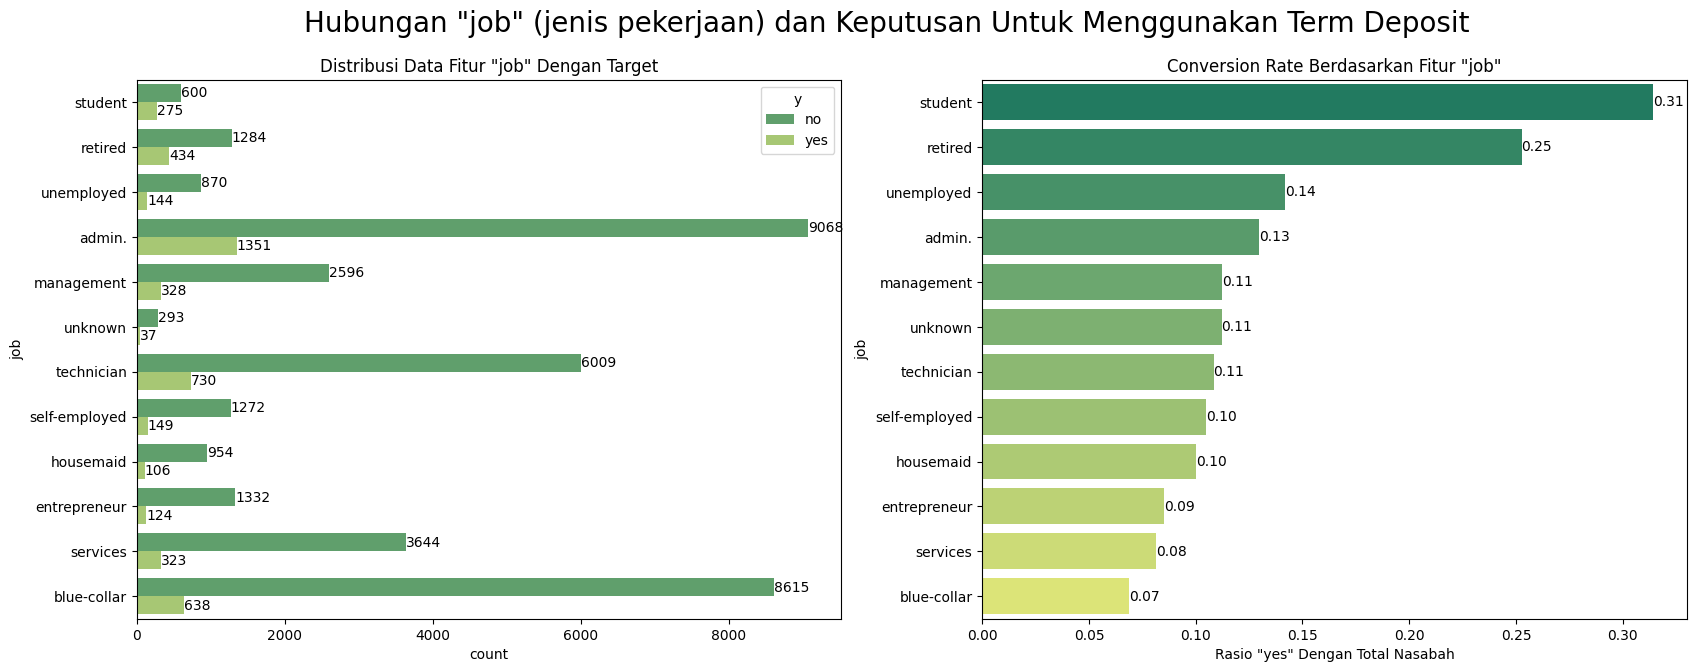

In [13]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "job" (jenis pekerjaan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['job','age']].groupby(['job'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['job','age']].groupby(['job']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur job dengan Target
axes[0].set_title('Distribusi Data Fitur "job" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'job', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['job'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='job', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['job'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "job"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Pekerjaan sebagai **`admin`**, merupakan pekerjaan yang paling banyak ditawari Term Deposit, dan juga merupakan pekerjaan dengan CVR yang cukup tinggi sekitar **0.13**. Hal ini bisa menjadi salah satu bahan pertimbangan perusahaan untuk tetap menawarkan produk Term Deposit kepada nasabah yang bekerja sebagai **`admin`**, atau memberikan penawaran yang menarik untuk jenis pekerjaan tersebut
* Pekerjaan sebagai **`blue-collar (buruh)`** merupakan pekerjaan tertinggi kedua setelah **`admin`** yang paling banyak ditawari produk Term Deposit namun pekerjaan tersebut memiliki CVR yang paling rendah dibanding dengan jenis pekerjaan lainnya. Hal ini memberi insight kepada perusahaan untuk membuat kebijakan baru atau metode yang lebih efektif lagi agar mereka dapat lebih tertarik dan menggunakan produk Term Deposit
* Pekerjaan sebagai **`student (pelajar)`** dan **`retired (pensiunan)`** memiliki conversion rate tertinggi dengan nilai masing-masing CVR adalah **0.31** dan **0.25**. Hal ini sesuai dengan insight dari fitur `age` dimana conversion rate tertinggi pada nasabah dengan **usia 65-74 tahun (mayoritas retired)**, dan nasabah dengan **usia 15-24 (mayoritas pelajar)**
* Hal unik adalah pada nasabah dengan pekerjaan **`unemployed (pengangguran)`**, dimana pekerjaan tersebut merupakan pekerjaan dengan tingkat konversi tertinggi ketiga dengan nilai **0.14**
* Nasabah yang tidak dikeathui jenis pekerjaan nya **`unknown`** memiliki CVR yang cukup tinggi. Hal ini merupakan sinyal kepada perusahaan agar dapat lebih berhati-hati dan lebih detail dalam masalah pendataan identitas nasabah terutama pada bagian jenis pekerjaan

#### **3.1.3 Fitur `marital`**

Kita akan melihat hubungan antar fitur `marital` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

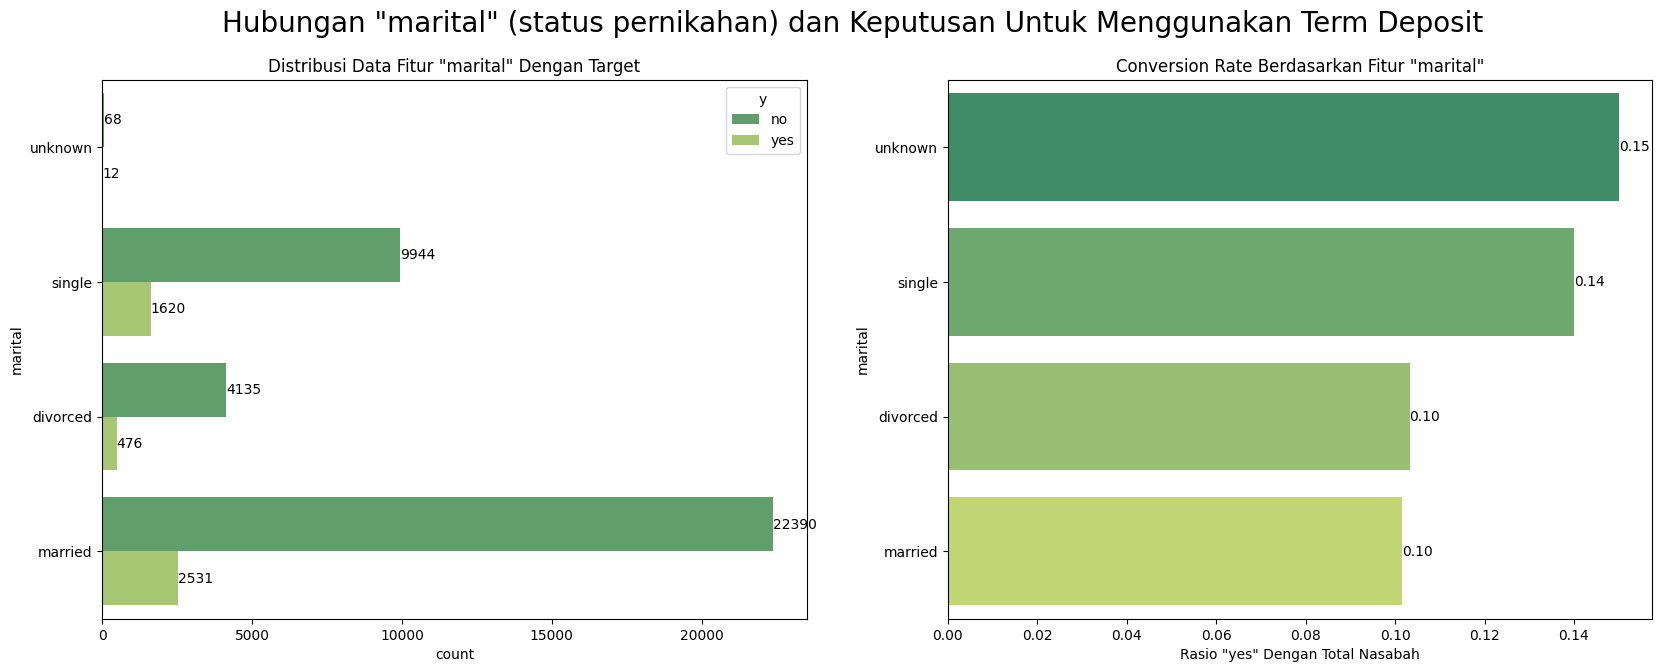

In [14]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "marital" (status pernikahan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['marital','age']].groupby(['marital'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['marital','age']].groupby(['marital']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur marital dengan Target
axes[0].set_title('Distribusi Data Fitur "marital" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'marital', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['marital'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='marital', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['marital'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "marital"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Nasabah dengan status pernikahan **`married (sudah menikah)`** merupakan status pernikahan yang paling banyak ditawari produk Term Deposit sekitar **24,921 nasabah**. Hal ini juga sesuai dengan insight dari fitur `age`, dimana nasabah yang paling banyak ditawari produk Term Deposit ialah nasabah dengan rentang usia 25-39 tahun, dimana rentang usia tersebut ialah usia yang umumnya berstatus `married (sudah menikah)`
* Nasabah yang tidak diketahui status pernikahannya (`unknown`) memiliki CVR tertinggi dengan nilai **0.15**. Hal ini merupakan sinyal kepada perusahaan agar dapat lebih berhati-hati dan lebih detail dalam pendataan identitas nasabah pada bagian status pernikahan
* Nasabah yang berstatus `single (belum menikah)` memiliki CVR yang tinggi sekitar **0.14**. Hal ini dapat diterima karena nasabah dengan status `single (belum menikah)` relatif tidak memiliki pengeluaran yang banyak, sehingga nasabah tersebut memiliki cukup dana untuk dapat diinvestasikan pada produk Term Deposit

#### **3.1.4 Fitur `education`**

Kita akan melihat hubungan antar fitur `education` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

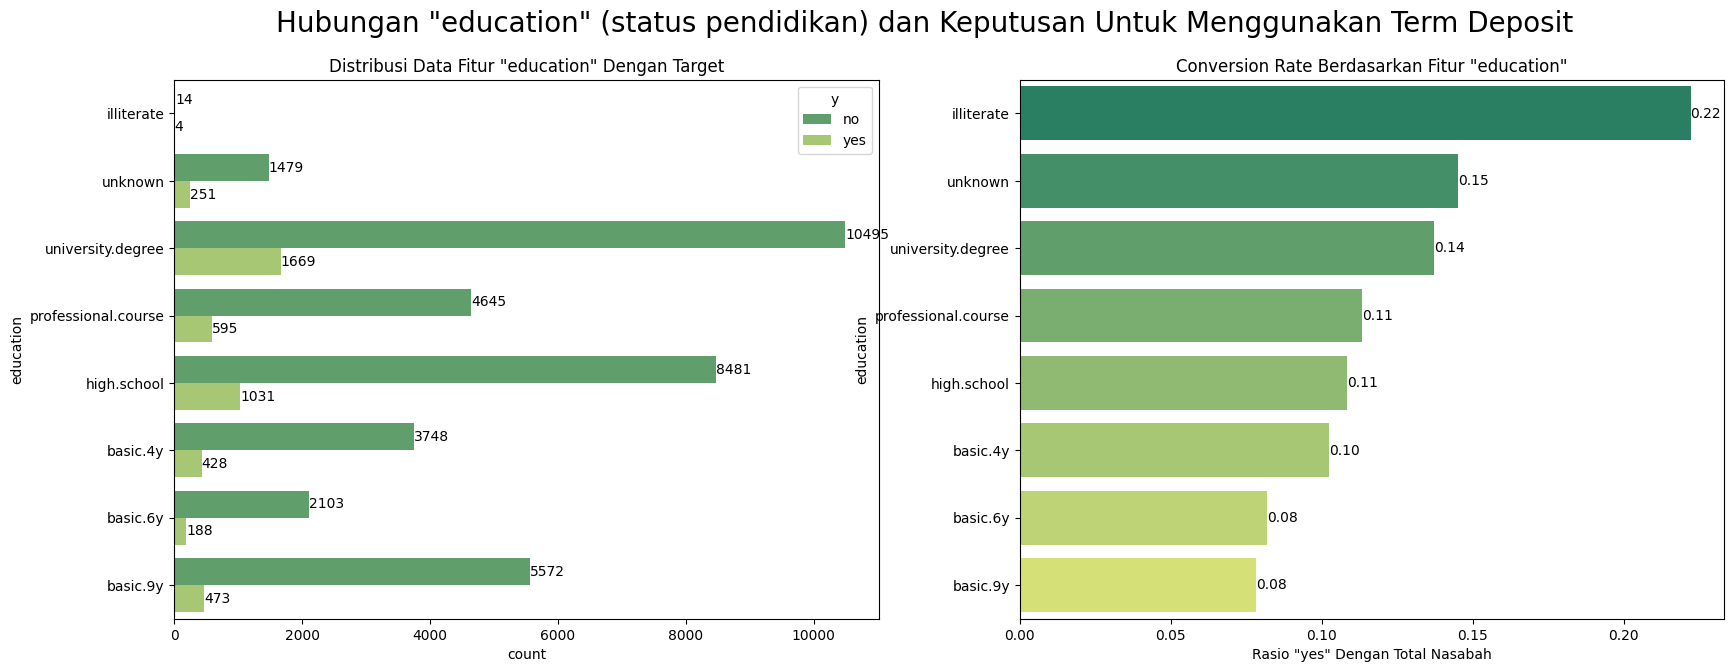

In [15]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "education" (status pendidikan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['education','age']].groupby(['education'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['education','age']].groupby(['education']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur education dengan Target
axes[0].set_title('Distribusi Data Fitur "education" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'education', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['education'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='education', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['education'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "education"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Dari grafik diatas nasabah dengan status pendidikan terakhir `university.degree (gelar universitas)` merupakan status terbanyak untuk ditawari produk Term Deposit. Dari grafik conversion rate, status pendidikan tersebut merupakan salah satu kelompok yang memiliki CVR tinggi sebesar **0.14**
* Nasabah yang tidak diketahui status pendidikannya (`unknown`) menempati posisi kedua kelompok dengan nilai CVR tertinggi yaitu **0.15**. Lagi-lagi perusahaan harus lebih berhati-hati dan lebih detail dalam pendataan identitas nasabah pada bagian status pendidikan ini
* Nasabah dengan status pendidikan `illiterate` (tidak pernah mengecap pendidikan) memiliki nilai CVR tertinggi yaitu sebesar **0.22**. Hal ini akan sulit untuk diambil kesimpulan, karena jika dilihat dari jumlah datanya, nasabah dengan status `illiterate` hanya berjumlah **18 nasabah** atau **0.04% dari total populasi** dalam dataset ini

#### **3.1.5 Fitur `default`**

Kita akan melihat hubungan antar fitur `education` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

In [16]:
# # Visualisasi sebaran data terhadap target serta conversion rate
# fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

# plt.suptitle('Hubungan default (Kredit Macet) dan Keputusan untuk Term Deposit', size = 20)

# dfratio = df[['default','age']].groupby(['default'],as_index=False).count()
# # dfratio['y'] = df[df['y'] == 'yes'][['default','age']].groupby(['default']).count().values
# # dfratio['ratio'] = dfratio['y']/dfratio['age']
# # dfratio.sort_values('ratio',ascending=False)
# # plot2=sns.barplot(data=dfratio, y='default', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['default'],ax=axes[0])
# # axes[0].set_title('Conversion Rate Berdasarkan default')
# # plt.xlabel('ratio yes/total')

# axes[1].set_title('Distribusi Data Target berdasarkan default')
# plot1=sns.countplot(hue = 'y', y = 'default', data = df,order=dfratio.sort_values(by='ratio',ascending=False)['default'],ax=axes[1])
# plt.xticks(rotation=90)

# plt.show()

#### **3.1.6 Fitur `housing`**

Kita akan melihat hubungan antar fitur `housing` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

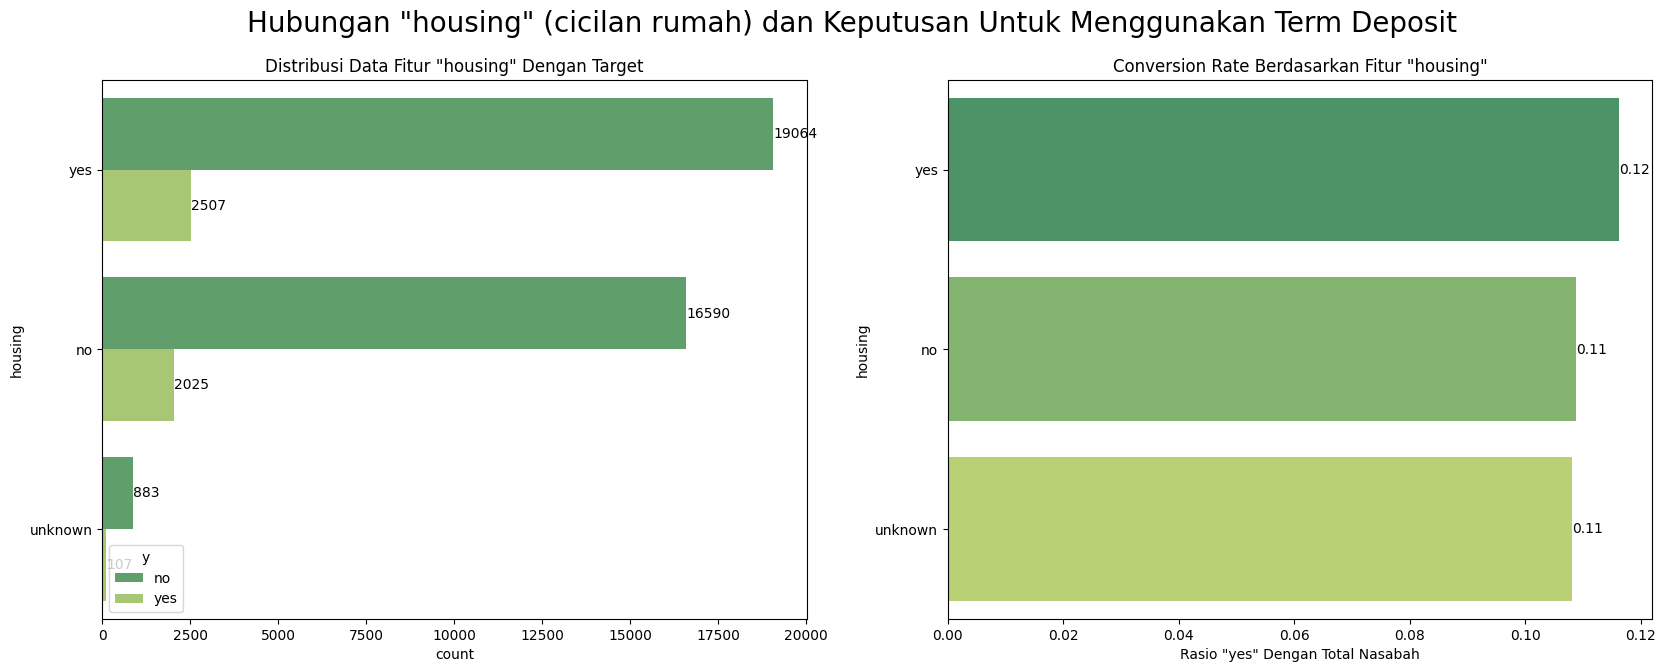

In [17]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "housing" (cicilan rumah) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['housing','age']].groupby(['housing'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['housing','age']].groupby(['housing']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur housing dengan Target
axes[0].set_title('Distribusi Data Fitur "housing" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'housing', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['housing'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='housing', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['housing'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "housing"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

#### **3.1.7 Fitur `loan`**

Kita akan cek pesebaran data untuk fitur `loan`

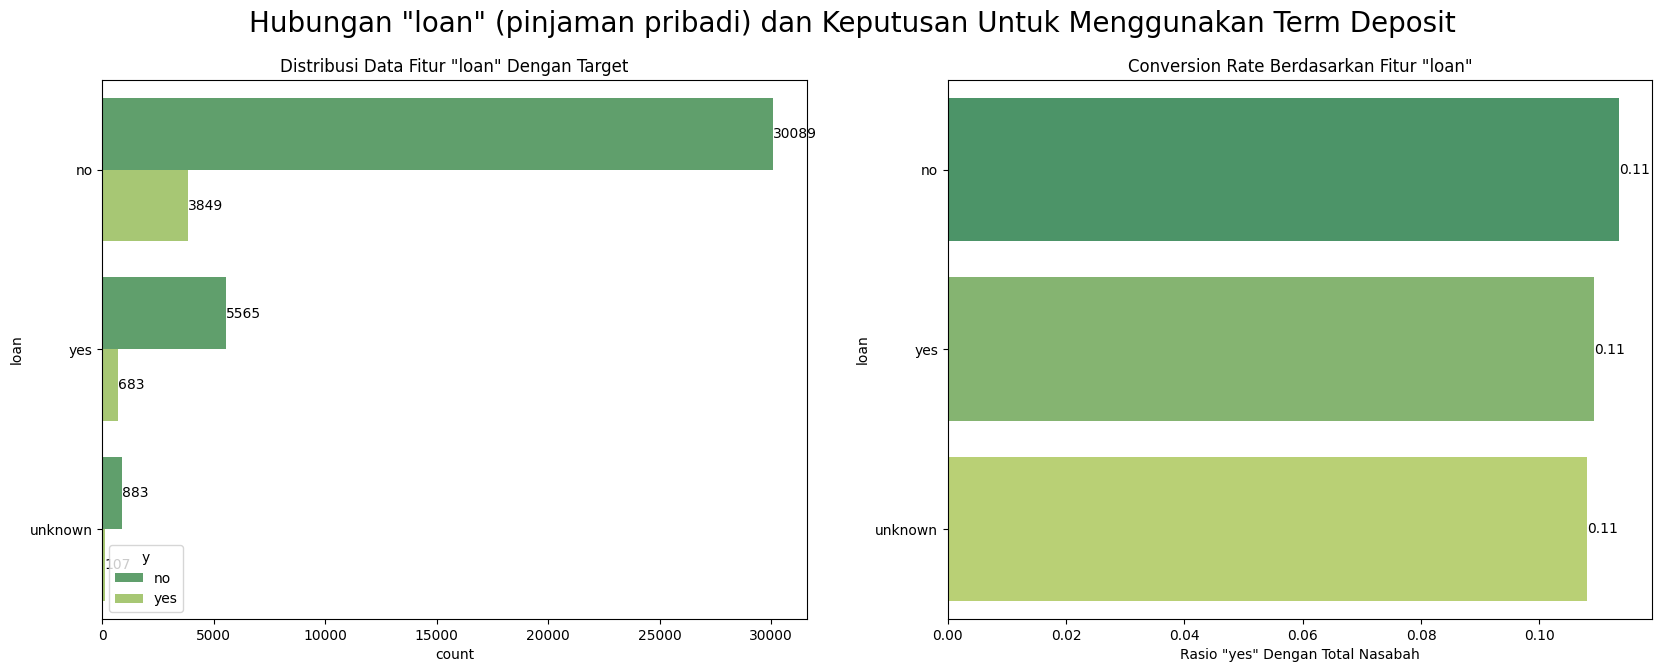

In [18]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "loan" (pinjaman pribadi) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['loan','age']].groupby(['loan'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['loan','age']].groupby(['loan']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur loan dengan Target
axes[0].set_title('Distribusi Data Fitur "loan" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'loan', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['loan'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='loan', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['loan'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "loan"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

### **3.2 Analisis Metode Kontak Yang Dilakukan** (`contact`, `month`, `day_of_week`, `duration`)

#### **3.2.1 Fitur `contact`**

#### **3.2.2 Fitur `month`**

#### **3.2.3 Fitur `day_of_week`**

#### **3.2.4 Fitur `duration`**

### **3.3 Analisis Hasil Campaign Sebelumnya** (`campaign`, `pdays`, `previous`, `poutcome`)

#### **3.3.1 Fitur `campaign`**

Pada fitur campaign, pertama kita akan cek pesebaran nilai dan kita uji normalitas data, apakah data berdistribusi normal atau tidak

<Figure size 1500x2000 with 0 Axes>

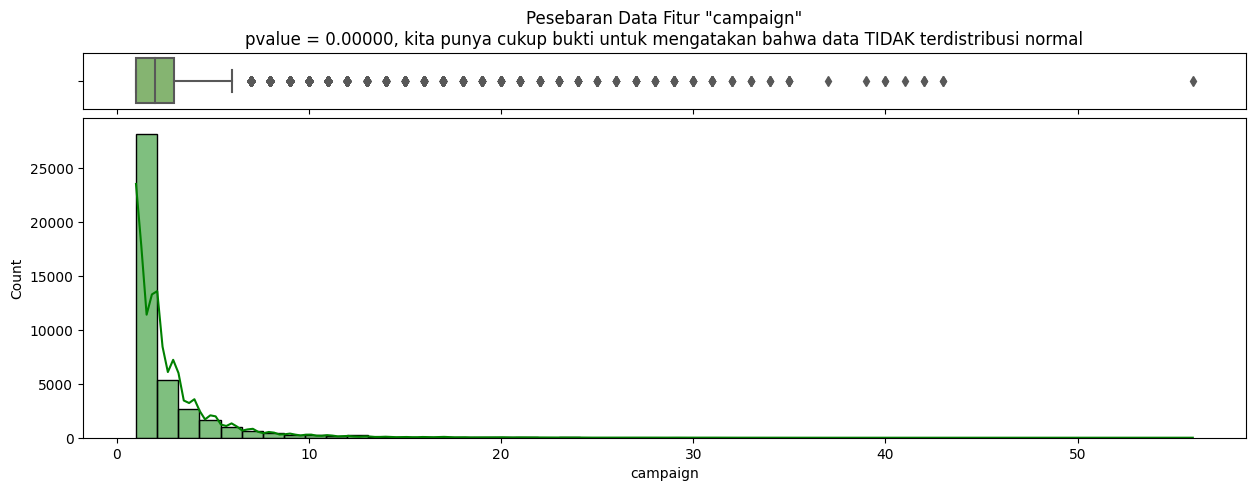

In [19]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["campaign"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "campaign"\n{distribusi}""", color = "black")
sns.boxplot(x = df["campaign"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["campaign"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kanan (Right-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai terendah-nya yaitu nasabah yang dikontak selama campaign sebanyak kurang dari 10 kali 
* Karena data ber-distribusi tidak normal. Maka, untuk mengetahui dimana posisi banyak nilai data terkumpul didalam distribusi (central of tendency) kita akan menggunakan nilai median. Nilai median diperoleh dengan mengurutkan data dari nilai yang terkecil hingga ke nilai yang terbesar, kemudian mencari titik yang membagi data menjadi dua kelompok

Setelah mengetahui ukuran pemusatan data yang akan kita gunakan, selanjutnya kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

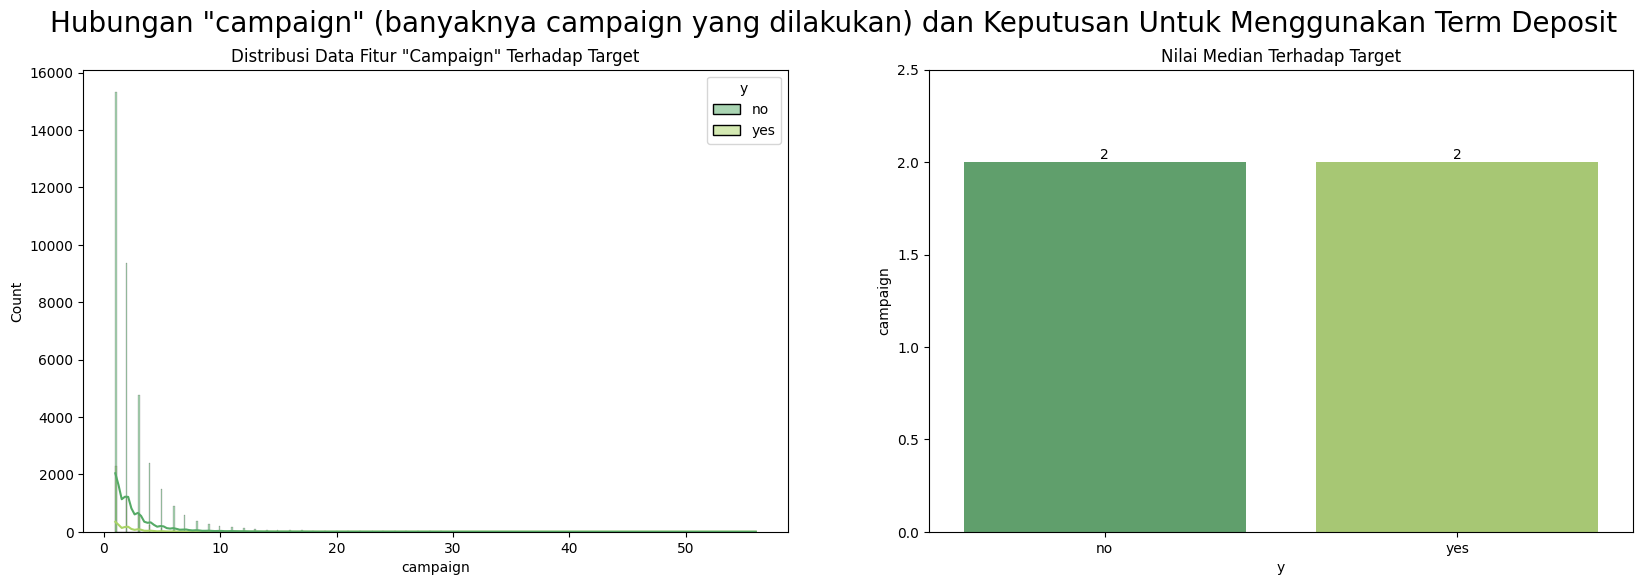

In [20]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "campaign" (banyaknya campaign yang dilakukan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "Campaign" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['campaign'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'campaign', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 2.5])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari jumlah kontak yang dilakukan kepada nasabah selama campaign yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `campaign` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data campaign 'Yes' >= Distribusi data campaign 'No'
- Ha : Distribusi data campaign 'Yes' < Distribusi data campaign 'No'

In [21]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['campaign'],
    df[df['y'] == 'no']['campaign'],
    alternative = 'less'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "campaign" pada orang yang setuju untuk term deposit LEBIH KECIL secara stokastik dibandingkan
          distribusi data "campaign" pada orang yang menolak melakukan term deposit
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "campaign" pada orang yang setuju untuk term deposit LEBIH KECIL secara stokastik dibandingkan
          distribusi data "campaign" pada orang yang menolak melakukan term deposit
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "campaign" pada orang yang setuju untuk term deposit LEBIH KECIL secara stokastik dibandingkan
          distribusi data "campaign" pada orang yang menolak melakukan term deposit
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`campaign`" antara nasabah yang menggunakan Term Deposit lebih kecil dibanding dengan nasabah yang tidak menggunakan Term Deposit**. Artinya adalah fitur `campaign` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

Setelah kita mengetahui bahwa fitur `campaign` dapat berpengaruh pada keputasan nasabah menggunakan Term Deposit atau tidak, selanjutnya kita akan melihat hubungan antar fitur campaign dan duration dengan fitur target untuk melihat efisiensi jumlah kontak panggilan dengan calon nasabah menggunakan Scatter Plot berikut:

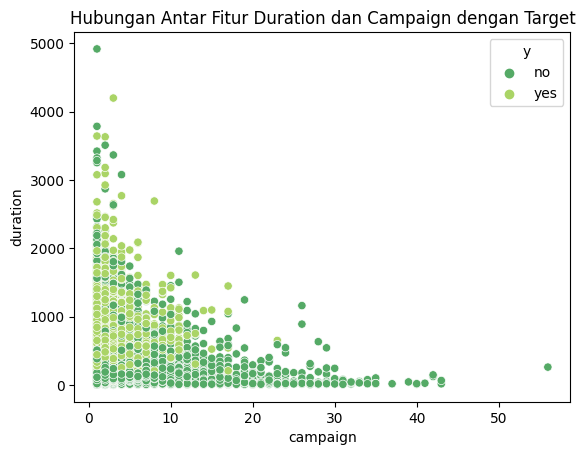

In [22]:
# Scatter plot hubungan fitur duration, campaign dengan target

plt.title('Hubungan Antar Fitur Duration dan Campaign dengan Target')
sns.scatterplot(data=df, x = 'campaign', y = 'duration', hue='y', palette="summer")
plt.show()

__Insight:__

Dari scatter plot diatas bisa kita lihat bahwa nasabah yang menggunakan term deposit cukup dikontak **maksimal 20 kali** saja, nasabah yang dikontak **lebih dari 20 kali** cenderung tidak tertarik lagi dengan produk yang ditawarkan. Hal ini masuk akal, karena ketika kita dikontak **lebih dari 20 kali** kita cenderung akan menganggap itu sebagai panggilan spam

#### **3.3.2 Fitur `pdays`**

<Figure size 1500x2000 with 0 Axes>

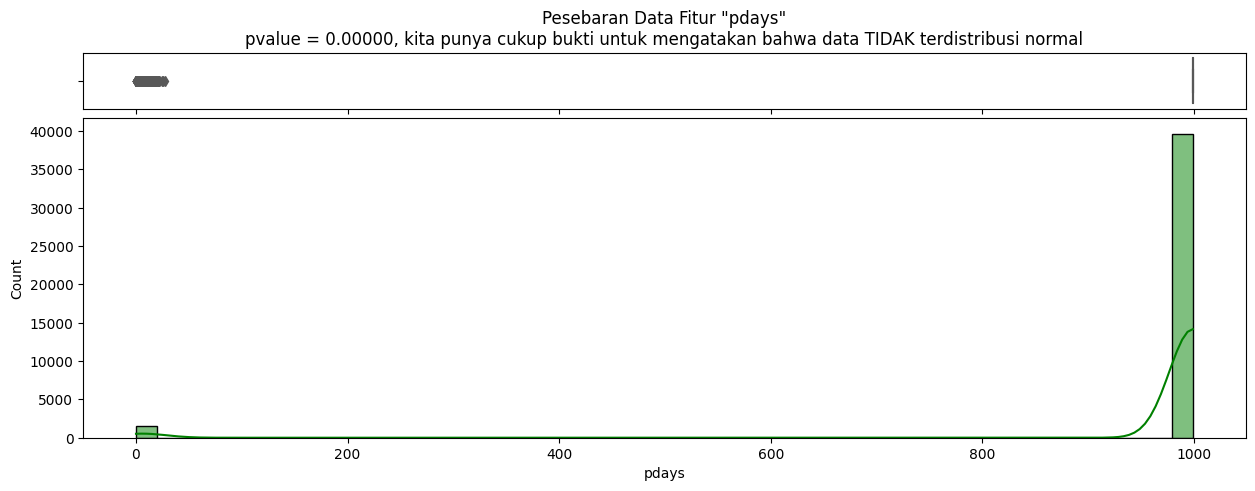

In [23]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["pdays"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "pdays"\n{distribusi}""", color = "black")
sns.boxplot(x = df["pdays"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["pdays"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kiri (Left-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai tertinggi-nya yaitu kategori "**999**" atau nasabah yang tidak pernah dihubungi dari campaign sebelumnya. 
* Karena data ber-distribusi tidak normal. Maka, untuk mengetahui dimana posisi banyak nilai data terkumpul didalam distribusi (central of tendency) kita akan menggunakan nilai median. Nilai median diperoleh dengan mengurutkan data dari nilai yang terkecil hingga ke nilai yang terbesar, kemudian mencari titik yang membagi data menjadi dua kelompok

Selanjutnya kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

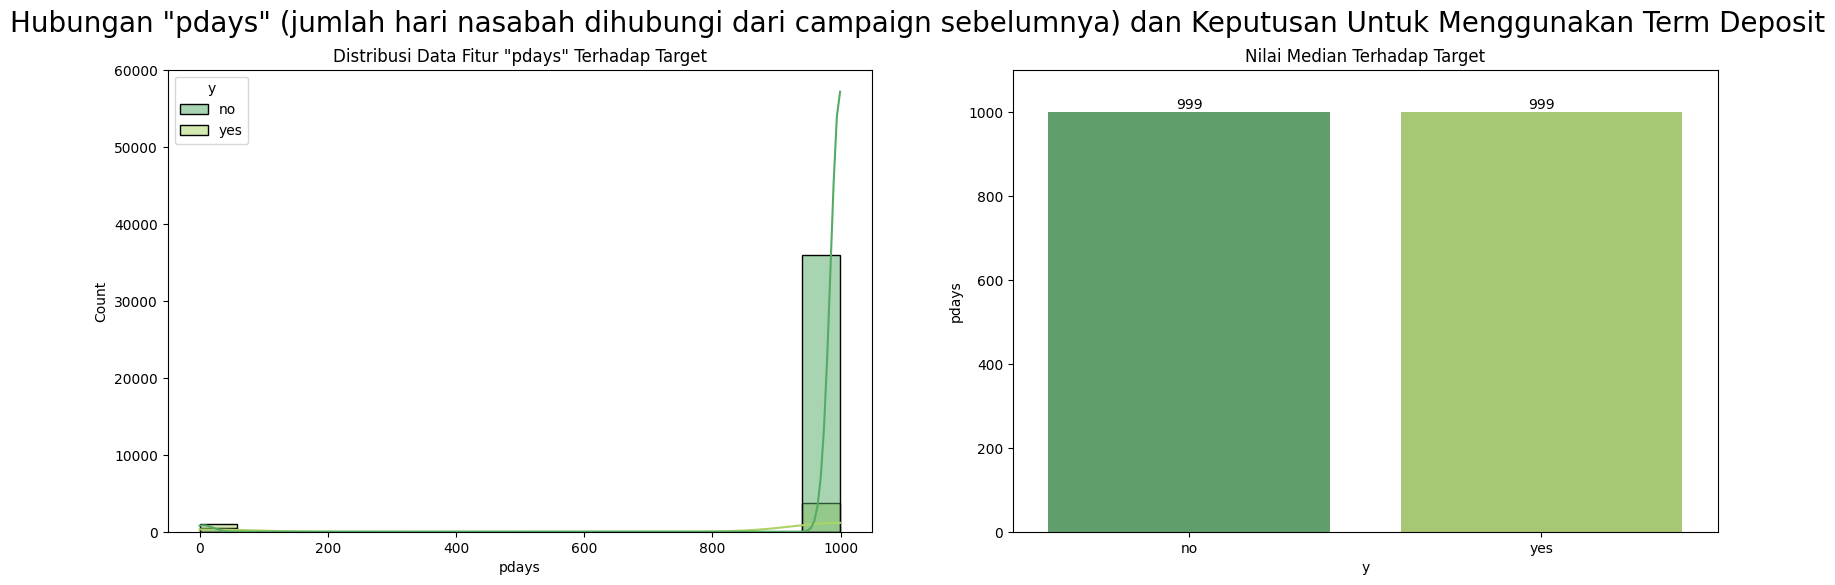

In [24]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "pdays" (jumlah hari nasabah dihubungi dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "pdays" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['pdays'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'pdays', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 1100])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas **sulit untuk melihat perbedaan nilai median dari lamanya kontak terakhir yang dilakukan kepada nasabah (dalam hari) yang menggunakan Term Deposit atau tidak**(*masih menggunakan data nasabah yang belum pernah dihubungi sebelumnya "999"*). Maka untuk mengetahui apakah nilai median dari fitur `pdays` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data pdays 'Yes' == Distribusi data pdays 'No'
- Ha : Distribusi data pdays 'Yes' != Distribusi data pdays 'No'

In [25]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['pdays'],
    df[df['y'] == 'no']['pdays'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`pdays`" antara nasabah yang menggunakan Term Deposit dan  yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `pdays` ini **dapat berpengaruh** pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

Analisa sebelumnya ialah analisa yang masih menggunakan data nasabah yang tidak pernah dikontak sebelumnya (**kategori "999"**). Sekarang untuk melihat distribusi fitur `pdays` jika nasabah yang tidak pernah dihubungi sebelumnya dihapus dari dataset, dan kita akan mencari insight dari lamanya waktu nasabah terakhir kali dihubungi dengan fitur target, maka kita akan coba menghapus data nasabah yang belum pernah dikontak sebelumnya (kategori "999")

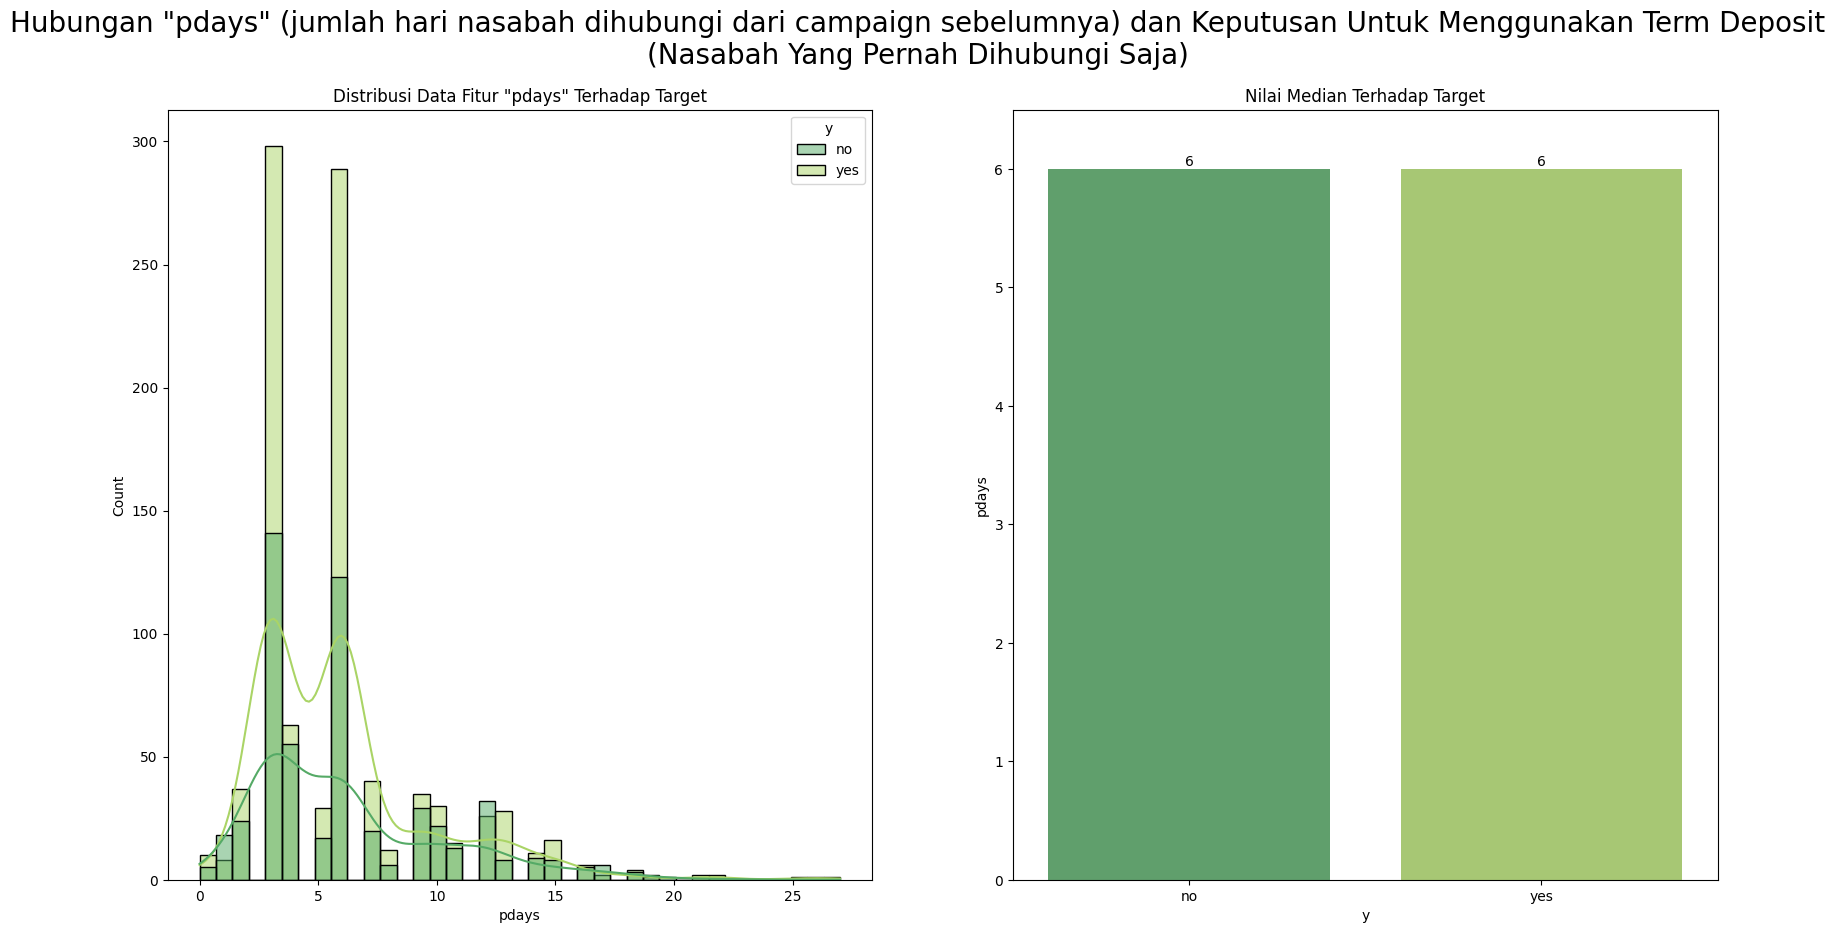

In [26]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target (exclude "999")

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,10))

plt.suptitle('Hubungan "pdays" (jumlah hari nasabah dihubungi dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit\n(Nasabah Yang Pernah Dihubungi Saja)', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "pdays" Terhadap Target')
plot1=sns.histplot(data = df[df['pdays'] != 999], hue = 'y', x = df[df['pdays'] != 999]['pdays'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'pdays', data = df[df['pdays'] != 999], estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 6.5])

plt.show()

__Insight:__

Sama seperti pada grafik sebelumnya. Nilai median terhadap target **sulit untuk dilihat perbedaan nilai median dari lamanya kontak terakhir yang dilakukan kepada nasabah (dalam hari) yang menggunakan Term Deposit atau tidak**(*hanya menggunakan data nasabah yang pernah dihubungi sebelumnya*). Maka untuk mengetahui apakah nilai median dari fitur `pdays` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data pdays nasabah yang pernah dihubungi 'Yes' == Distribusi data pdays nasabah yang pernah dihubungi 'No'
- Ha : Distribusi data pdays nasabah yang pernah dihubungi 'Yes' != Distribusi data pdays nasabah yang pernah dihubungi 'No'

In [27]:
# Uji Hipotesis Mann Whitney

df_without999 = df[df['pdays'] != 999]

stat, pvalue = mannwhitneyu(
    df_without999[df_without999['y'] == 'yes']['pdays'],
    df_without999[df_without999['y'] == 'no']['pdays'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')


          Nilai pvalue = 0.38457
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita tidak punya cukup bukti untuk mengatakan bahwa distribusi data "`pdays`" antara nasabah yang menggunakan Term Deposit dan  yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `pdays` yang telah menghapus data nasabah yang belum pernah dihubingi ini **tidak berpengaruh** pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **3.3.3 Fitur `previous`**

<Figure size 1500x2000 with 0 Axes>

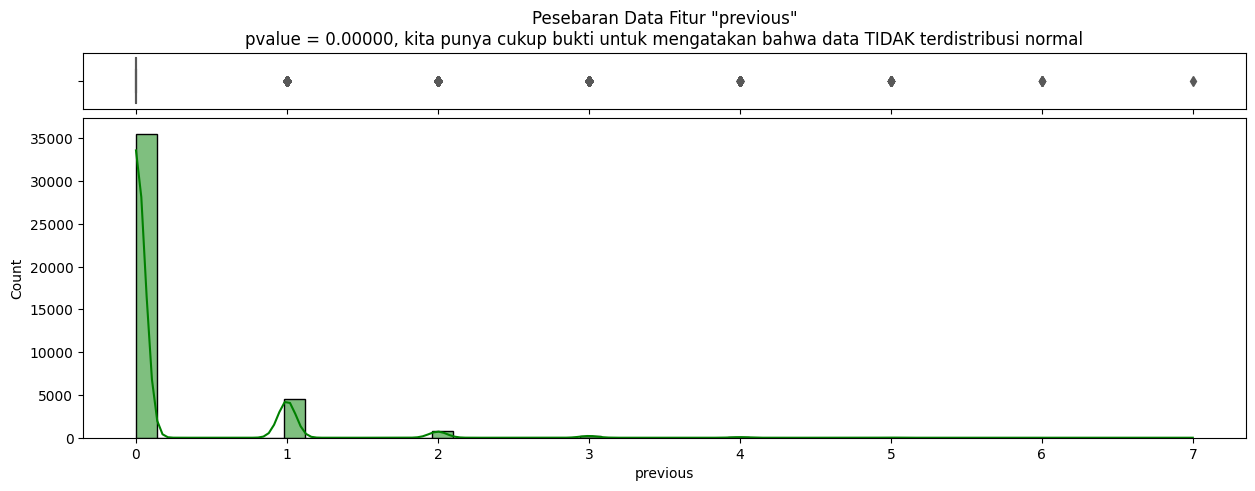

In [28]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["previous"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "previous"\n{distribusi}""", color = "black")
sns.boxplot(x = df["previous"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["previous"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__

Sebagian besar distribusi berada di nilai terendahnya yaitu "**0**", yaitu orang yang tidak dihubungi pada campaign sebelumnya. Hal ini sesuai dengan fitur `pdays` pada pembahasan sebelumnya, dimana pesebaran data tertinggi ada di kategori "**999**" yaitu nasabah yang tidak dihubungi pada campaign sebelumnya.

Selanjutnya kita lihat nilai central of tendency (menggunakan nilai median) pada fitur `previous` ini dengan fitur **target** dan kita cek juga visualisasi pesebaran data dengan targetnya

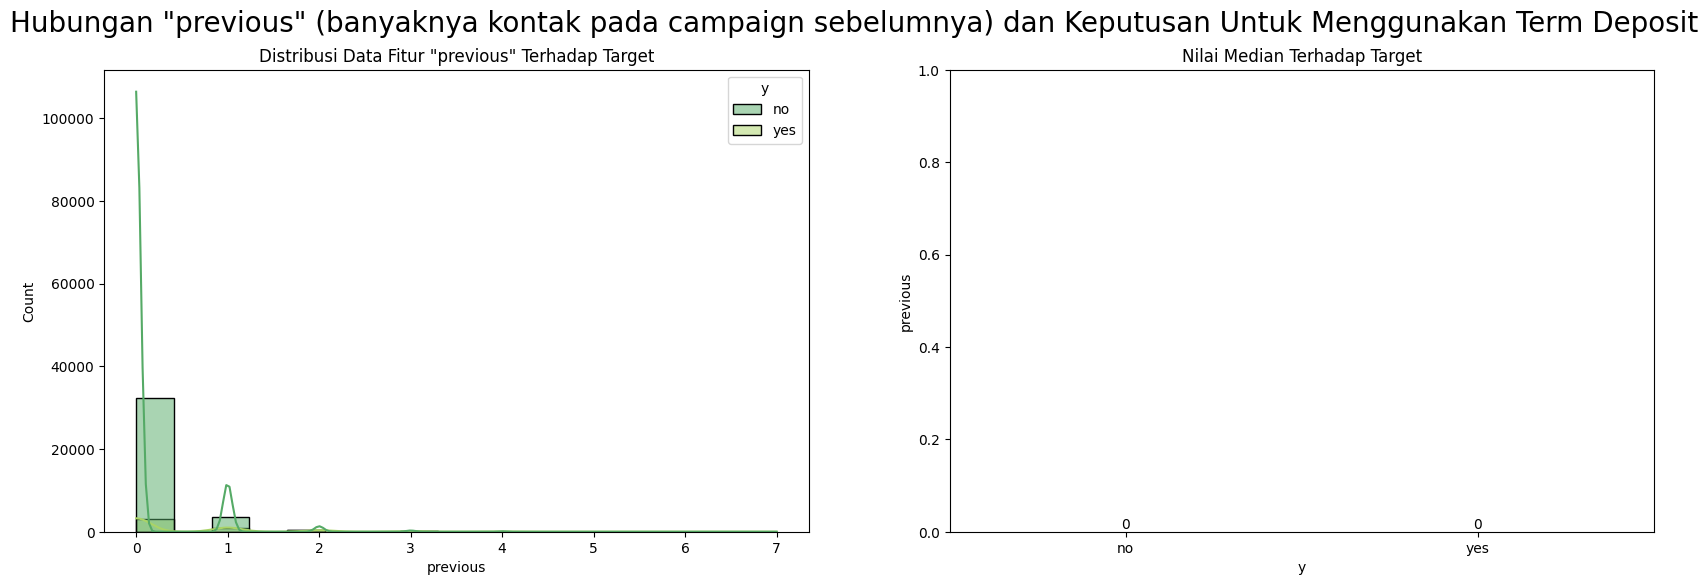

In [29]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "previous" (banyaknya kontak pada campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "previous" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['previous'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'previous', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 1])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas, kita sulit untuk melihat perbedaan nilai median dari banyaknya kontak yang dilakukan kepada nasabah pada campaign sebelumnya. Maka untuk mengetahui apakah nilai median dari fitur `previous` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data previous 'Yes' == Distribusi data previous 'No'
- Ha : Distribusi data previous 'Yes' != Distribusi data previous 'No'

In [30]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['previous'],
    df[df['y'] == 'no']['previous'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "previous" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "previous" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "previous" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`previous`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `previous` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

Pada analisa sebelumnya masih menggunakan data nasabah yang tidak pernah dihubungi sebelumnya (**kategori "0"**). Sekarang untuk melihat distribusi fitur `previous` jika nasabah yang tidak pernah dihubungi sebelumnya dihapus dari dataset, dan kita akan mencari insight dari banyaknya kontak yang dilakukan kepada nasabah pada campaign sebelumnya dengan fitur target, maka kita akan coba menghapus data nasabah yang tidak pernah dihubungi sebelumnya (kategori "0")

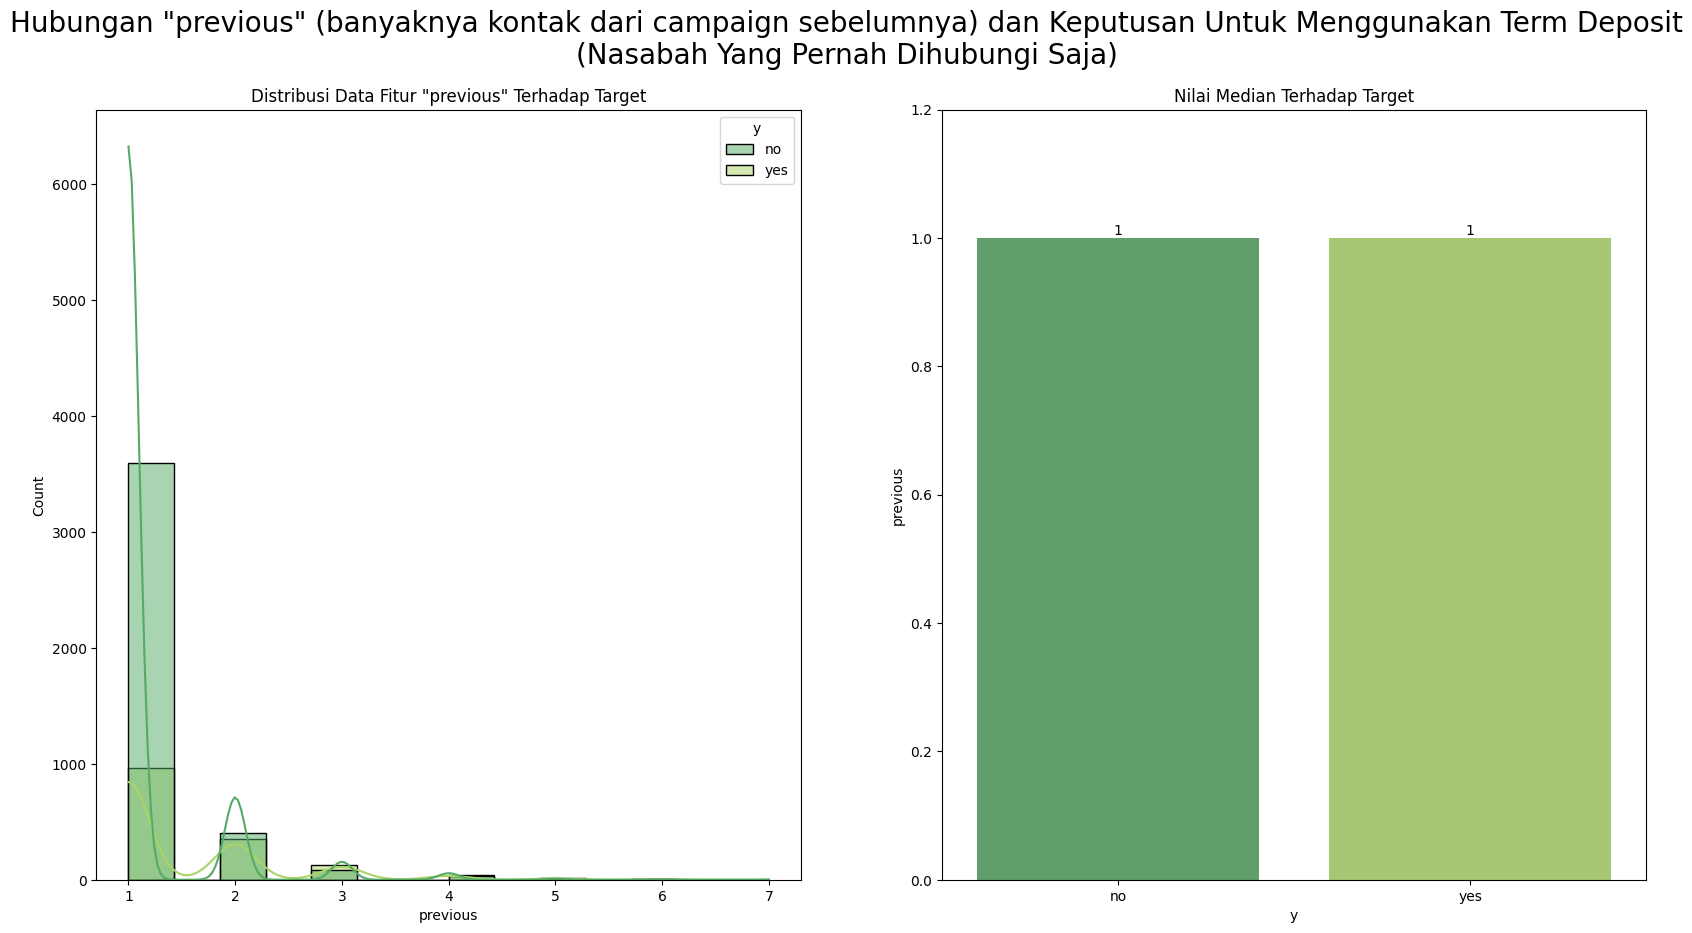

In [31]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target (exclude "0")

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,10))

plt.suptitle('Hubungan "previous" (banyaknya kontak dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit\n(Nasabah Yang Pernah Dihubungi Saja)', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "previous" Terhadap Target')
plot1=sns.histplot(data = df[df['previous'] != 0], hue = 'y', x = df[df['previous'] != 0]['previous'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'previous', data = df[df['previous'] != 0], estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 1.2])

plt.show()

__Insight:__

Sama seperti pada grafik sebelumnya. Nilai median terhadap fitur target **sulit untuk dilihat perbedaan nilai median dari jumlah kontak yang dilakukan kepada nasabah yang menggunakan Term Deposit atau tidak**(*hanya menggunakan data nasabah yang pernah dihubungi sebelumnya*). Maka untuk mengetahui apakah nilai median dari fitur `previous` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data previous nasabah yang pernah dihubungi 'Yes' == Distribusi data previous nasabah yang pernah dihubungi 'No'
- Ha : Distribusi data previous nasabah yang pernah dihubungi 'Yes' != Distribusi data previous nasabah yang pernah dihubungi 'No'

In [32]:
# Uji Hipotesis Mann Whitney

df_without0 = df[df['previous'] != 0]

stat, pvalue = mannwhitneyu(
    df_without0[df_without0['y'] == 'yes']['previous'],
    df_without0[df_without0['y'] == 'no']['previous'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" (jumlah kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "previous" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          (ditribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" (jumlah kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "previous" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          (ditribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" (jumlah kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "previous" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          (ditribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`previous`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan** bahkan ketika datanya sudah difilter sebelumnya. Artinya adalah fitur `previous` ini baik masih menggunakan data nasabah yang belum pernah dikontak, maupun nasabah yang sudah pernah dikontak sebelumnya ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **3.3.4 Fitur `poutcome`**

Kita akan melihat hubungan antar fitur `poutcome` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

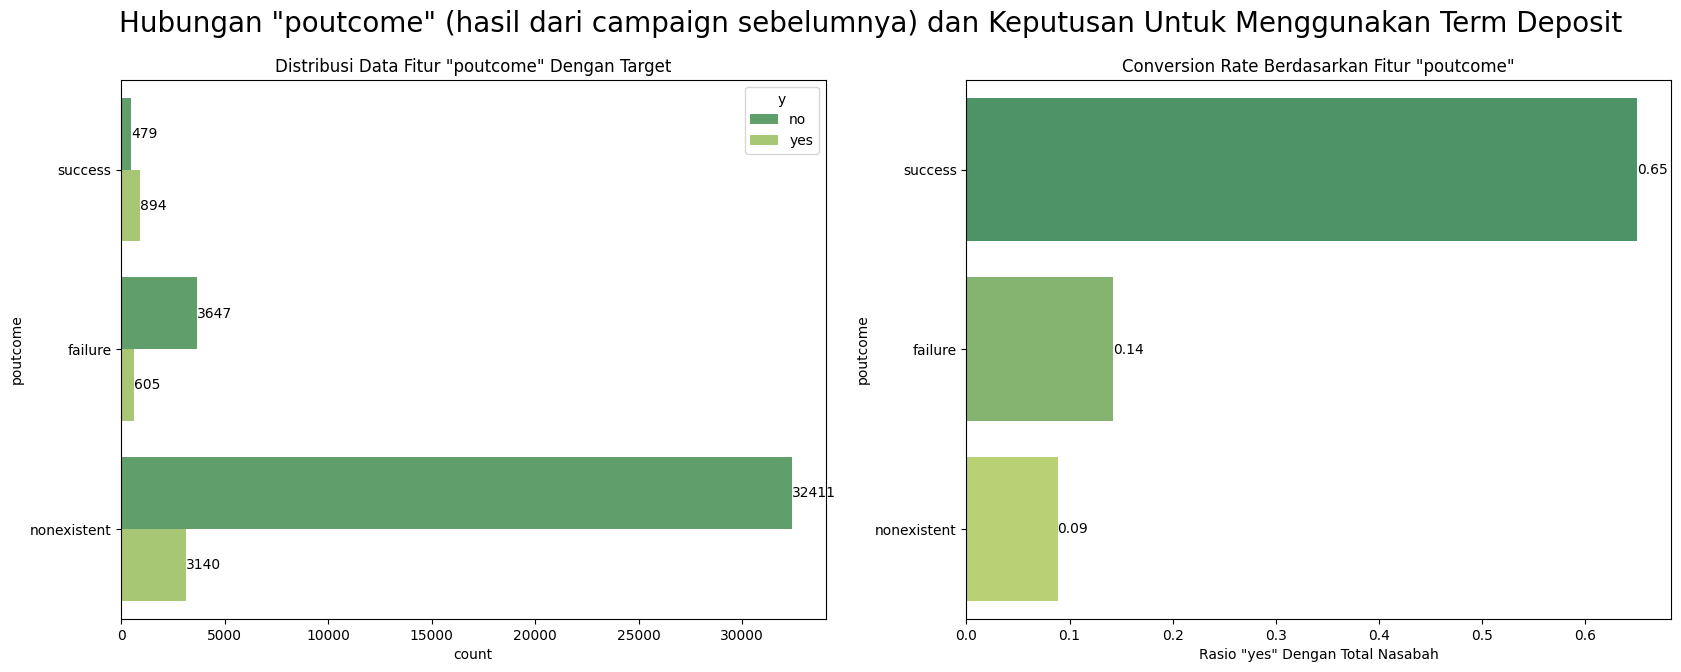

In [33]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "poutcome" (hasil dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['poutcome','age']].groupby(['poutcome'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['poutcome','age']].groupby(['poutcome']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur poutcome dengan Target
axes[0].set_title('Distribusi Data Fitur "poutcome" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'poutcome', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['poutcome'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='poutcome', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['poutcome'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "poutcome"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Kategori terbanyak dari hasil campaign pemasaran sebelumnya ialah **nonexistent (tidak ada)**. Artinya, sebagian besar nasabah merupakan nasabah baru yang belum pernah mendapatkan campaign sebelumnya. Hal ini sesuai dengan analisis beberapa fitur sebelumnya
* Yang perlu diperhatikan disini adalah, nasabah yang sukses pada campaign sebelumnya memiliki CVR tertinggi sebesar **0.65**. Hal ini menandakan bahwa nasabah yang sukses pada campaign sebelumnya ini memiliki kecenderungan yang sangat tinggi untuk menggunakan produk Term Deposit pada campaign berikutnya.

### **3.4 Analisis Data Ekonomi Negara Portugal** (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`)

#### **3.4.1 Fitur `emp.var.rate`**

<Figure size 1500x2000 with 0 Axes>

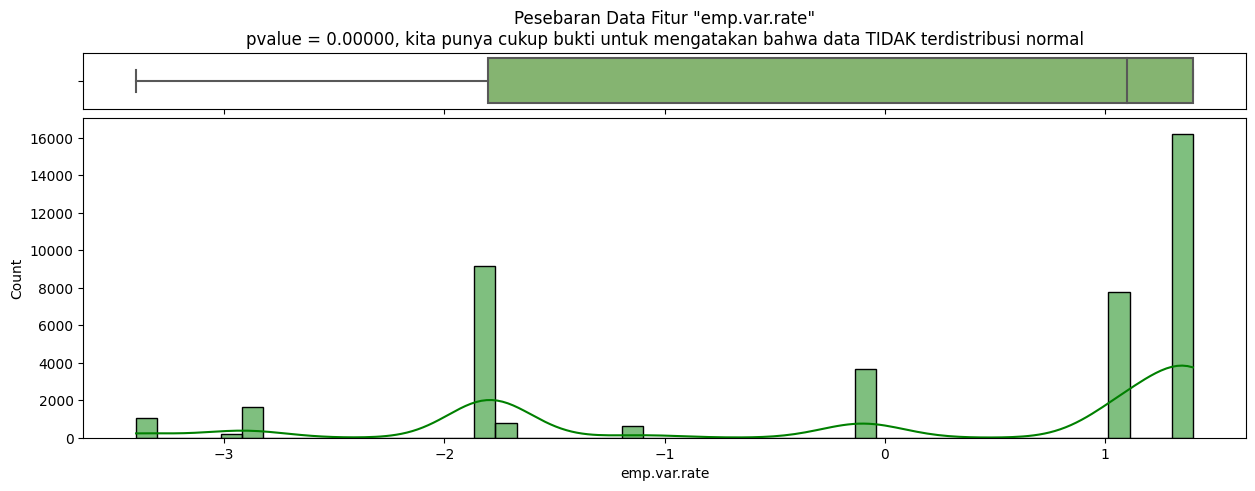

In [34]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["emp.var.rate"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "emp.var.rate"\n{distribusi}""", color = "black")
sns.boxplot(x = df["emp.var.rate"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["emp.var.rate"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kanan (Right-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai terendah-nya yaitu rentang usia 30-45 tahun 
* Nasabah yang paling banyak dihubungi ialah nasabah dengan range usia 30-45 tahun. Hal ini menandakan bank menargetkan calon nasabah dengan rentang usia tersebut dengan harapan usia tersebut meruakan usia yang dianggap sudah matang dari sisi finansial dan sedang dalam masa produktif-nya

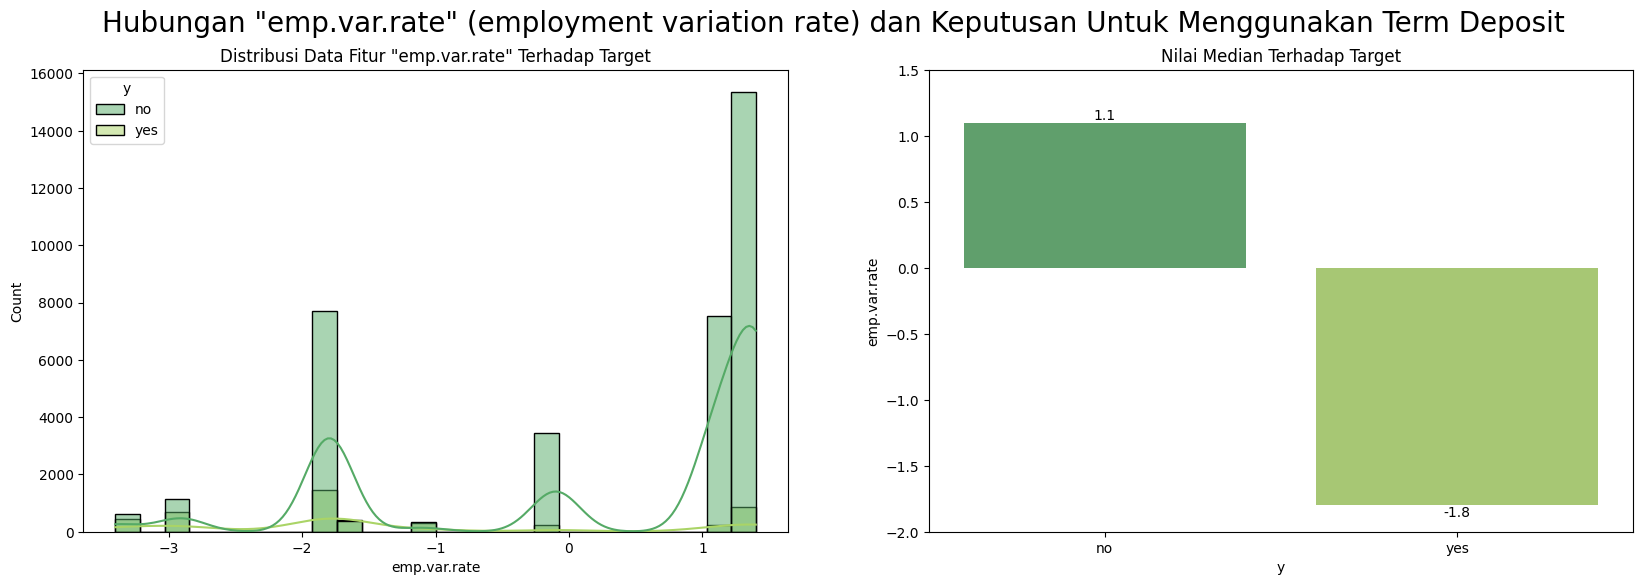

In [35]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "emp.var.rate" (employment variation rate) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "emp.var.rate" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['emp.var.rate'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'emp.var.rate', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([-2, 1.5])

plt.show()

**Insight :**

Dari grafik nilai median terhadap target diatas terlihat jelas bahwa **nasabah akan melakukan/ menggunakan produk Term Deposit ketika indikator variansi penyerapan tenaga kerja sedang bernilai negatif (-1 sampai dengan -3.4)** **`##DITANYAKAN##`**

#### **3.4.2 Fitur `cons.price.idx`**

<Figure size 1500x2000 with 0 Axes>

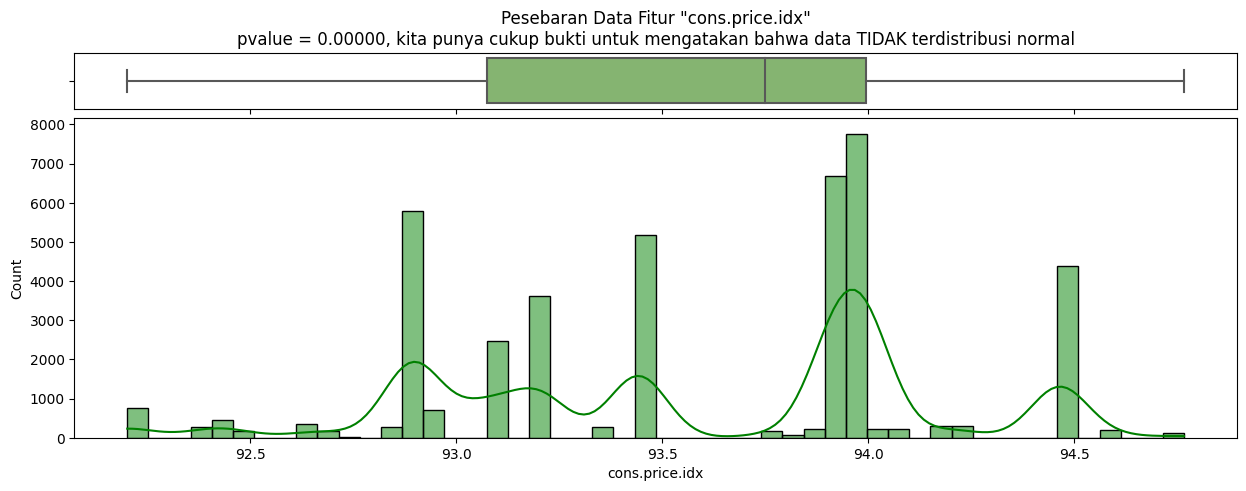

In [36]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["cons.price.idx"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "cons.price.idx"\n{distribusi}""", color = "black")
sns.boxplot(x = df["cons.price.idx"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["cons.price.idx"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

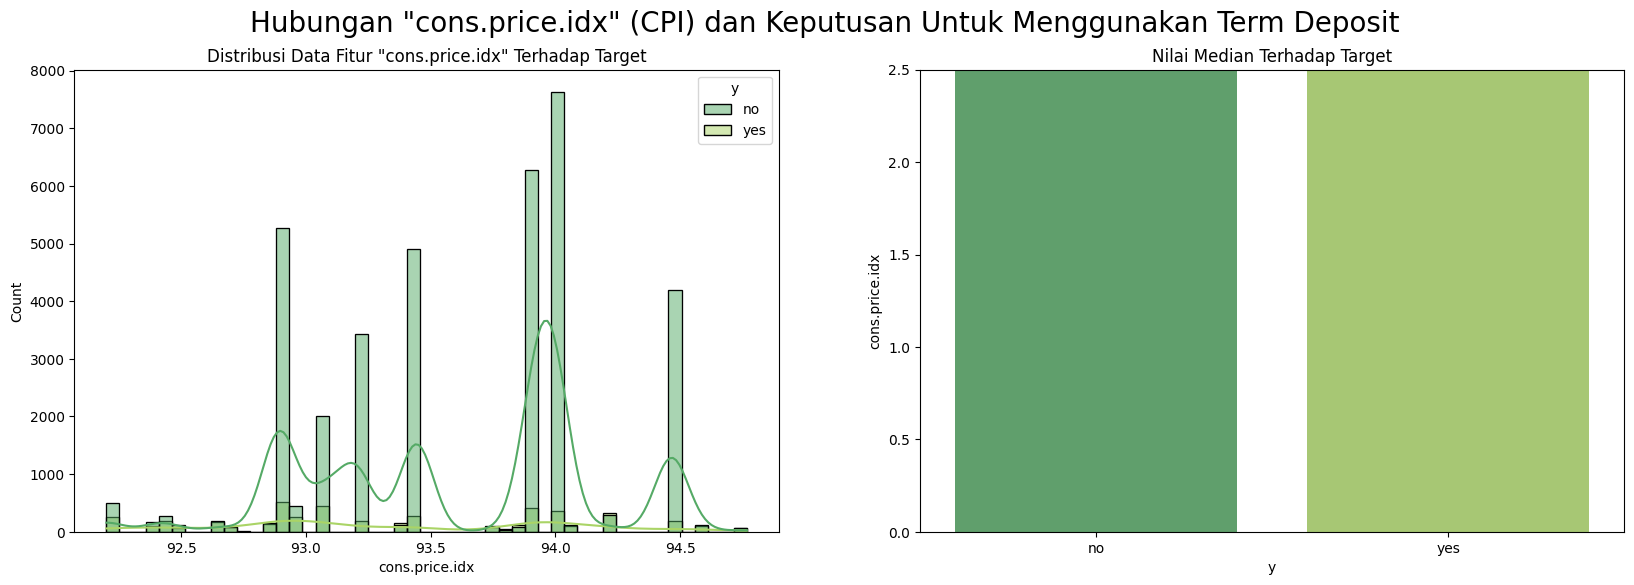

In [37]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "cons.price.idx" (CPI) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "cons.price.idx" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['cons.price.idx'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'cons.price.idx', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 2.5])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari indeks CPI dari nasabah yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `cons.price.idx` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data cons.price.idx 'Yes' == Distribusi data cons.price.idx 'No'
- Ha : Distribusi data cons.price.idx 'Yes' != Distribusi data cons.price.idx 'No'

In [38]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['cons.price.idx'],
    df[df['y'] == 'no']['cons.price.idx'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.price.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.price.idx" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.price.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.price.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.price.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.price.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`cons.price.idx`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `cons.price.idx` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **3.4.3 Fitur `cons.conf.idx`**

<Figure size 1500x2000 with 0 Axes>

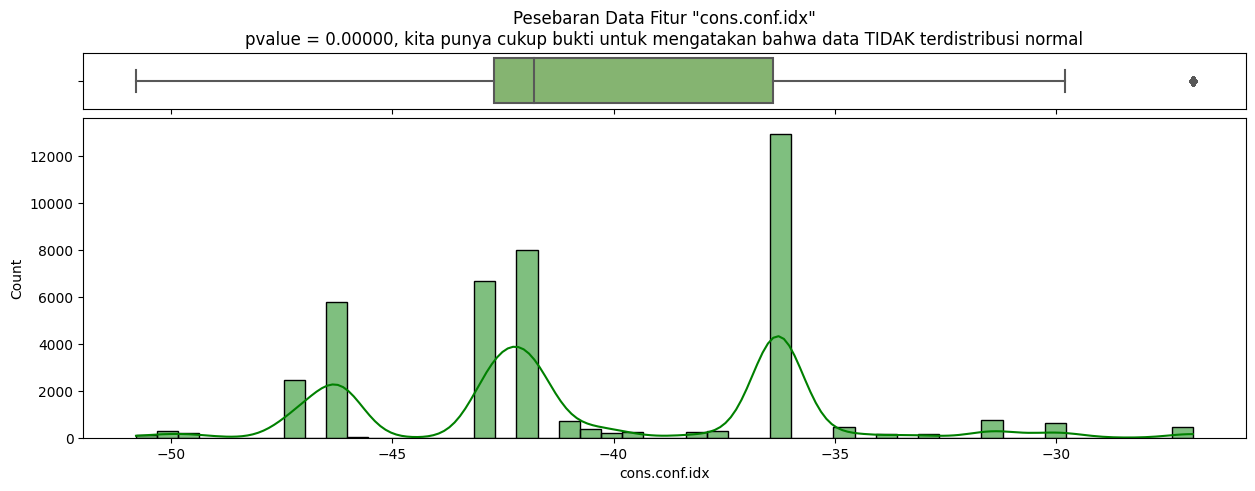

In [39]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["cons.conf.idx"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "cons.conf.idx"\n{distribusi}""", color = "black")
sns.boxplot(x = df["cons.conf.idx"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["cons.conf.idx"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

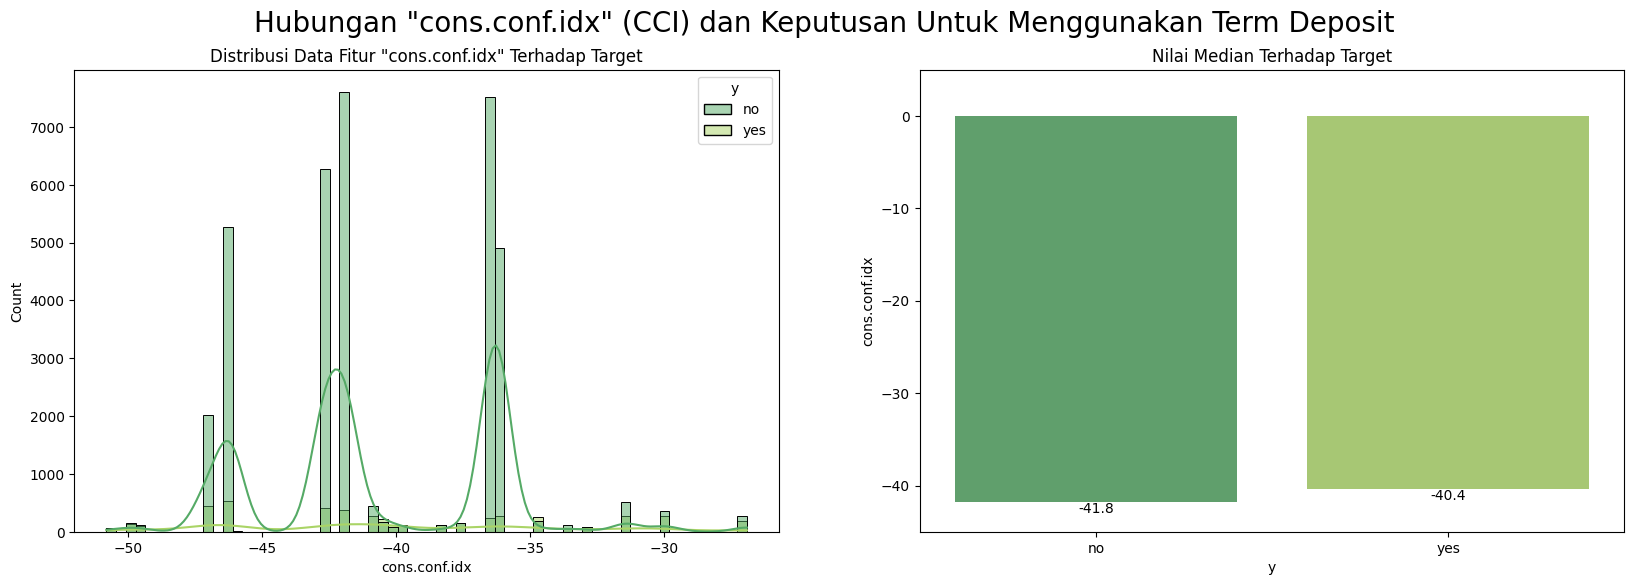

In [40]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "cons.conf.idx" (CCI) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "cons.conf.idx" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['cons.conf.idx'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'cons.conf.idx', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([-45, 5])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari indeks CCI dari nasabah yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `cons.conf.idx` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data cons.conf.idx 'Yes' == Distribusi data cons.conf.idx 'No'
- Ha : Distribusi data cons.conf.idx 'Yes' != Distribusi data cons.conf.idx 'No'

In [41]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['cons.conf.idx'],
    df[df['y'] == 'no']['cons.conf.idx'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.conf.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.conf.idx" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.conf.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.conf.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.conf.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.conf.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`cons.conf.idx`" antara nasabah yang menggunakan Term Deposit dan nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `cons.conf.idx` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **3.4.4 Fitur `euribor3m`**

<Figure size 1500x2000 with 0 Axes>

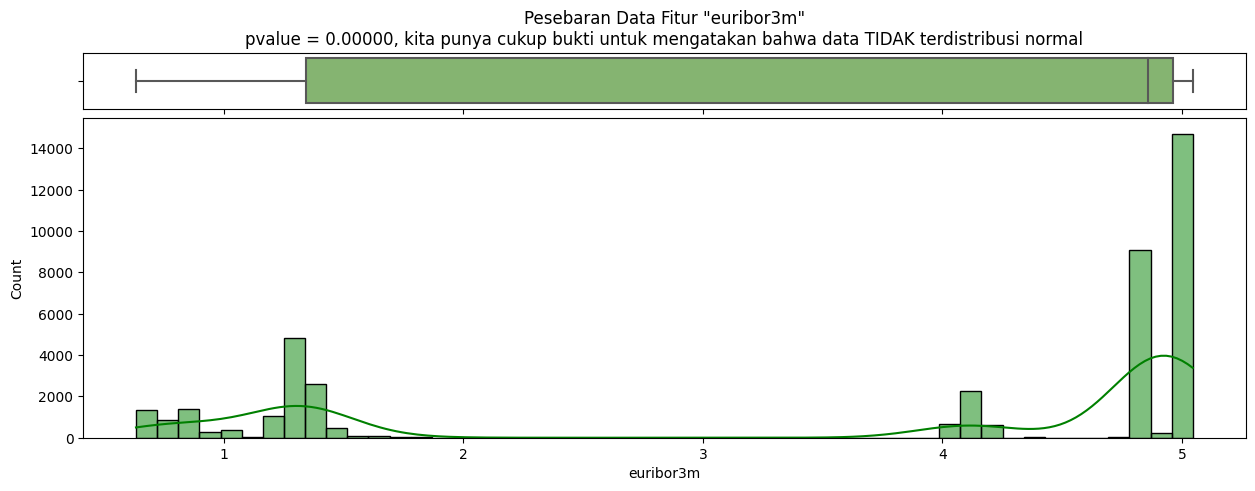

In [42]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["euribor3m"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "euribor3m"\n{distribusi}""", color = "black")
sns.boxplot(x = df["euribor3m"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["euribor3m"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

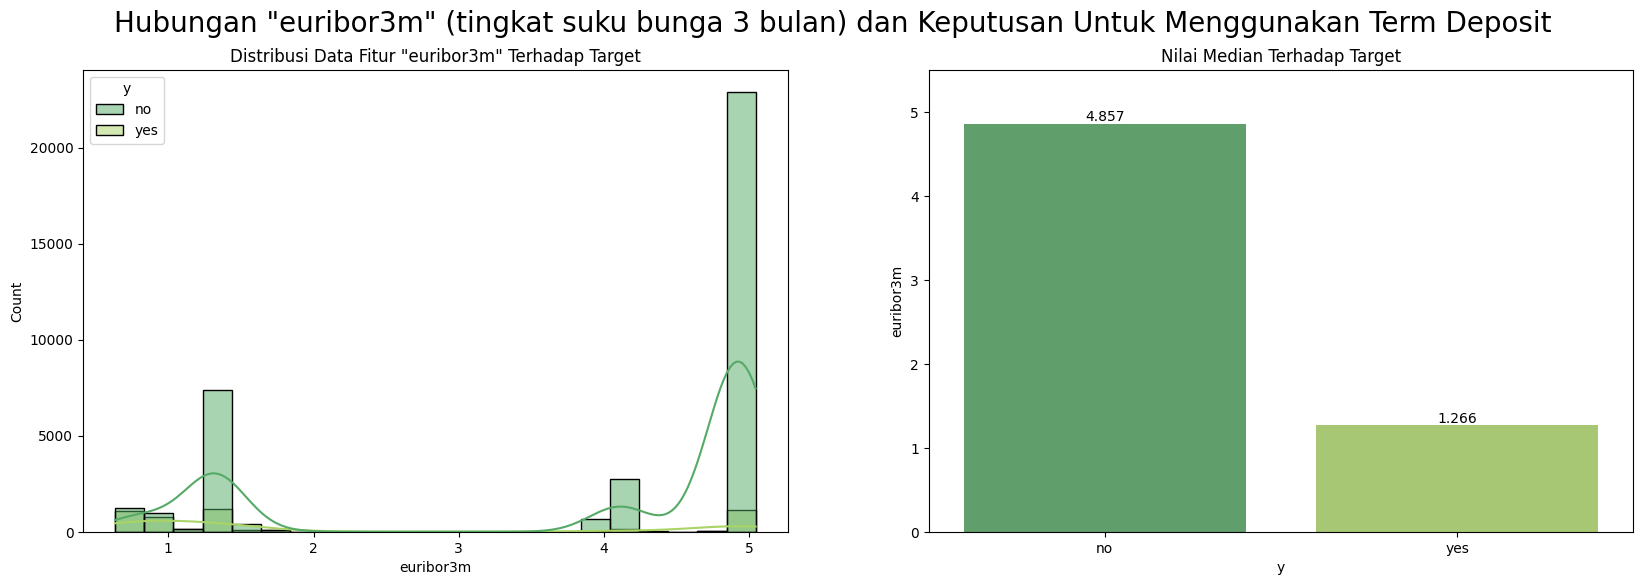

In [43]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "euribor3m" (tingkat suku bunga 3 bulan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "euribor3m" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['euribor3m'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'euribor3m', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 5.5])

plt.show()

**Insight :**

Dari grafik nilai median terhadap target diatas terlihat jelas bahwa **nasabah akan melakukan/ menggunakan produk Term Deposit ketika ...** **`##DITANYAKAN##`**

#### **3.4.5 Fitur `nr.employed`**

<Figure size 1500x2000 with 0 Axes>

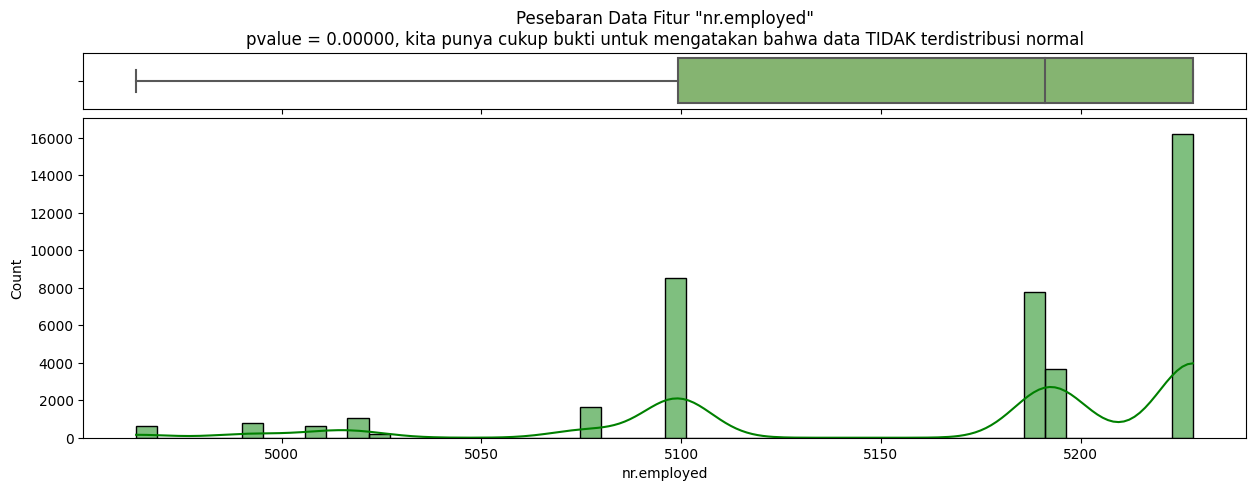

In [44]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["nr.employed"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "nr.employed"\n{distribusi}""", color = "black")
sns.boxplot(x = df["nr.employed"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["nr.employed"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

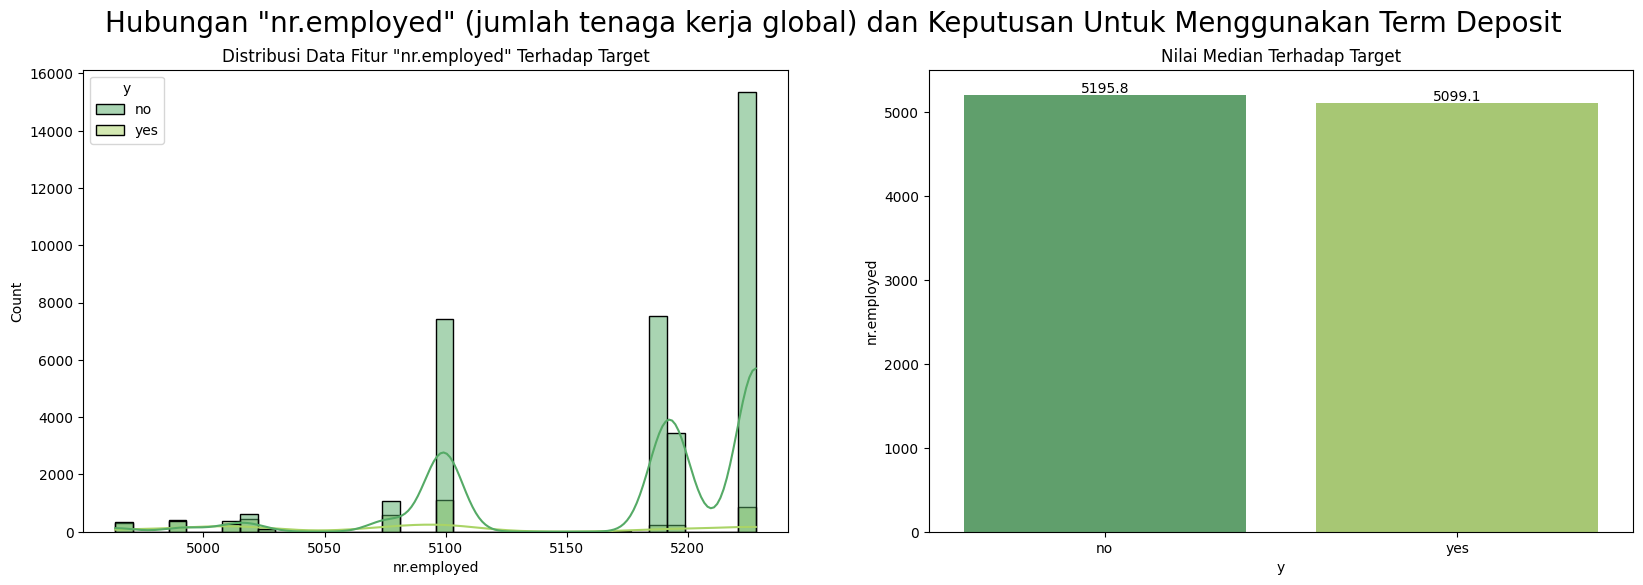

In [45]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "nr.employed" (jumlah tenaga kerja global) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "nr.employed" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['nr.employed'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'nr.employed', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 5500])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari indikator jumlah tenaga kerja global dari nasabah yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `nr.employed` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data nr.employed 'Yes' == Distribusi data nr.employed 'No'
- Ha : Distribusi data nr.employed 'Yes' != Distribusi data nr.employed 'No'

In [46]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['nr.employed'],
    df[df['y'] == 'no']['nr.employed'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "nr.employed" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "nr.employed" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "nr.employed" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "nr.employed" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "nr.employed" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "nr.employed" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`nr.employed`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `nr.employed` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

### **3.5 Summary EDA**

Berdasarkan dari analisis yang telah kita lakukan sebelumnya, dapat memberikan beberapa kesimpulan atau ringkisan sebagai berikut:

* ubawf
* waosd

Kesimpulan diatas juga dapat meningkatkan conversion rate (CVR) dari setiap fitur, dan diharapkan juga dapat meningkatkan keuntungan dari bank tersebut

### <font size="4.5">Setelah kita mendapatkan summary dari tahap `Exploratory Data Analysis (EDA)` diatas, maka kita **sudah dapat menjawab pertanyaan mengenai karakteristik nasabah yang menggunakan produk Term Deposit**. Selanjutnya kita akan masuk ke tahap `Data Preprocessing for Machine Learning`</font>

## **`4. Data Preprocessing`**

Pada bagian `Data Preprocessing` ini, kita akan melakukan beberapa treatment pada dataset yang kita miliki agar sesuai dengan kebutuhan model machine learning yang akan digunakan. Tahap ini sangat penting dalam membangun model machine learning karena dapat mempengaruhi kinerja dan kualitas model yang akan dihasilkan. Treatment yang akan dilakukan pada dataset ini adalah sebagai berikut:

### **4.1 Handling Missing Value**

### **4.2 Handling Data Duplicated**

### **4.3 Handling Outlier**

### **4.4 Drop Column and Change Value**

### **4.5 Encoding**

[Encodeing](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02) adalah suatu metode yang dapat diterapkan untuk merepresentasikan variabel kategorik dalam machine learning. Berikut kita akan menerapkan dan mendefinisikan metode teknik encoding yang sesuai dengan data yang kita miliki

In [47]:
# data unik di tiap kolom

listItem = []
for col in df.describe(include='object').columns :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

df_object = pd.DataFrame(columns=['feature', 'n_unique', 'sample_unique'],
                     data=listItem)
df_object

,feature,n_unique,sample_unique
0,age_range,5,"[15-24, 25-39, 40-64, 65-74, >75]"
1,job,12,"[admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown]"
2,marital,4,"[divorced, married, single, unknown]"
3,education,8,"[basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown]"
4,default,3,"[no, unknown, yes]"
5,housing,3,"[no, unknown, yes]"
6,loan,3,"[no, unknown, yes]"
7,contact,2,"[cellular, telephone]"
8,month,10,"[apr, aug, dec, jul, jun, mar, may, nov, oct, sep]"
9,day_of_week,5,"[fri, mon, thu, tue, wed]"


__Insight:__
* Akan dilakukan **Ordinal Encoding** untuk fitur `education`. Alasan memilih **Ordinal Encoding**  karena fitur ini memiliki banyak unique value yaitu **8 unique value** dan fitur ini memiliki variabel ordinal. **Ordinal encoding** akan memberikan nilai unik kepada setiap kategori berdasarkan posisinya dalam urutannya
* Akan dilakukan **One Hot Encoding** untuk fitur `default`, `housing`, `loan`, `contact` dan `poutcome`. Alasan dipilihnya **One Hot Encoding** karena teknik ini akan mengganti setiap nilai kategori dengan nilai biner yang memiliki panjang sesuai dengan jumlah kategori unik dalam kolom kategori tersebut
* Akan dilakukan **Binary Encoding** untuk fitur `job`, `marital`, `month`, `day_of_week`. Alasan dipilihnya **Binary Encoding** karena pada fitur tersebut memiliki jumlah kategori yang terlalu banyak, jika kita menggunakan One Hot Encoding untuk fitur yang memiliki jumlah kategori yang banyak, maka model yang akan dibuat nanti akan semakin overfitting

Langkah pertama adalah kita akan mengurutkan nilai dari fitur `education` berdasarkan tingkatannya, kemudian kita akan memberikan nomor pada masing-masing nilai berdasarkan tingkatannya tersebut (ordinal mapping), sebagai berikut:

In [48]:
# Ordinal mapping kolom education

ordinal_mapping_education = [
    {'col':'education',
    'mapping':{
        'unknown' : 0, 
        'illiterate' : 1, 
        'basic.4y': 2, 
        'basic.6y' : 3,
        'basic.9y' : 4,
        'high.school' : 5,
        'professional.course' : 6,
        'university.degree' : 7
    }}
]

Setelah kita melakukan **ordinal mapping**, selanjutnya kita akan menerapkan teknik encoding pada fitur-fitur yang sudah di tentukan pada insight sebelumnya sebagai berikut:

In [53]:
# encoding features menggunakan teknik-teknik Encoding

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['default`, `housing`, `loan`, `contact`, `poutcome']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping_education), ['education']),
    ('binary', ce.BinaryEncoder(), ['job`, `marital`, `month`, `day_of_week'])
], remainder='passthrough') 

Cara kerja **encoding** adalah dengan menggantikan nilai-nilai kategori dengan representasi numerik sesuai dengan teknik encoding yang dipilih. Hal ini memungkinkan algoritma machine learning untuk bekerja dengan data kategorikal dan memahami hubungan antara kategori tersebut. Untuk dapat memahami cara kerja dari masing-masing teknik encoding diatas, dapat dicek [disini](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

### **4.6 Scalling**

[Scaling](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#83e6) adalah metode untuk melakukan transformasi terhadap data numerik agar antar variabel memiliki skala yang sama

Teknik scaling yang dilakukan dalam tahap preprocessing ini akan menggunakan teknik **`Robust Scaler`**. [Robust scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) ini sendiri adalah salah satu teknik yang digunakan untuk mengubah skala atau transformasi data agar cocok untuk digunakan dalam model machine learning. Dimana Robust Scaler ini digunakan ketika kita memiliki dataset yang mengandung outlier, karena teknik ini tidak terpengaruh oleh nilai ekstrem, dan teknik ini cocok digunakan ketika data tidak mengikuti distribusi normal. Namun teknik ini memiliki kekurangan yaitu teknik ini tidak mengubah distribusi data menjadi distribusi normal. Berikut kita akan menerapkan teknik Robust Scaler kedalam dataset yang kita miliki

In [ ]:
# scaling features menggunakan Robust Scaler

robust = RobustScaler()

Cara kerja dari teknik `Robust Scaler` ini ialah akan mengubah skala data dengan menggunakan nilai median dan IQR dari data

### **4.7 Data Splitting**, bagi dataset menjadi df_seen dan df_unseen

Idenya adalah ketika kita melakukan evaluasi terhadap model machine learning, kita ingin mendapatkan model yang dapat menggeneralisir serta akurat. Dalam melakukan generalisasi kita perlu membagi data menjadi 3 bagian, yaitu training set, validation set, dan test set. Dengan penjelasan sebagai berikut:
* Dataset akan kita bagi menjadi df_seen dan df_unseen
* df_seen yang kemudian akan kita bagi lagi menjadi X_train, X_val, y_train, y_val (untuk data training set dan data validasi set)
* df_unseen yang akan menjadi data test set pada model kita nanti

In [ ]:
# Membagi feature dan target
feature=df.drop(columns=['y']).columns
target='y'

In [57]:
# Melakukan data splitting

# Membagi dataset df_seen dan df_unseen dari dataset df
df_seen, df_unseen=train_test_split(df,
                                    stratify=df["y"].values, 
                                    test_size=0.2,random_state=0)

# Membagi dataset train dan validation dari df_seen
X_train, X_val, y_train, y_val=train_test_split(df_seen[feature], df_seen[target], 
                                                stratify=df_seen["y"].values, 
                                                test_size=0.2, random_state=0)

print(f"df_seen\nJumlah baris: {df_seen.shape[0]} baris\nJumlah kolom: {df_seen.shape[1]} kolom\n")
print(f"df_unseen\nJumlah baris: {df_unseen.shape[0]} baris\nJumlah kolom: {df_unseen.shape[1]} kolom\n")
print("=========================")
print(f"\nX_train\nJumlah baris: {X_train.shape[0]} baris\nJumlah kolom: {X_train.shape[1]} kolom\n")
print(f"X_val\nJumlah baris: {X_val.shape[0]} baris\nJumlah kolom: {X_val.shape[1]} kolom")

df_seen
Jumlah baris: 32940 baris
Jumlah kolom: 22 kolom

df_unseen
Jumlah baris: 8236 baris
Jumlah kolom: 22 kolom


X_train
Jumlah baris: 26352 baris
Jumlah kolom: 21 kolom

X_val
Jumlah baris: 6588 baris
Jumlah kolom: 21 kolom


### **4.8 Resampler**

Metode Resampling:
* SMOTE
* CNN
* NCR
* Near Miss
* Algorithm Based
    * ....


### <font size="4.5">Setelah dilakukan treatment pada tahap `Data Preprocesing` pada langkah diatas, maka kita `menganggap` data yang kita miliki sudah bersih dan siap untuk dilakukan modeling</font>

## **`5. Modeling and Hyperparameter Tuning`**

### **5.1 Modeling**

### **5.2 Hyperparameter Tuning**

### **5.3 Summary Hyperparameter Tuning**

### **5.4 Model Terpilih Ialah ...**

#### **5.4.1 Cara Kerja Model ...**

### **5.5 Interpretasi Model**

#### **5.5.1 Features Importances**

#### **5.5.2 SHAP**

### **5.6 Model-Based Features Selection**

## **`6. Probability and Financial Analysis`**

## **`7. Conclusion and Recommendation`**

### **7.1 Conclusion**

### **7.2 Recommendation**

## **`# CATATAN`**

<Figure size 1500x2000 with 0 Axes>

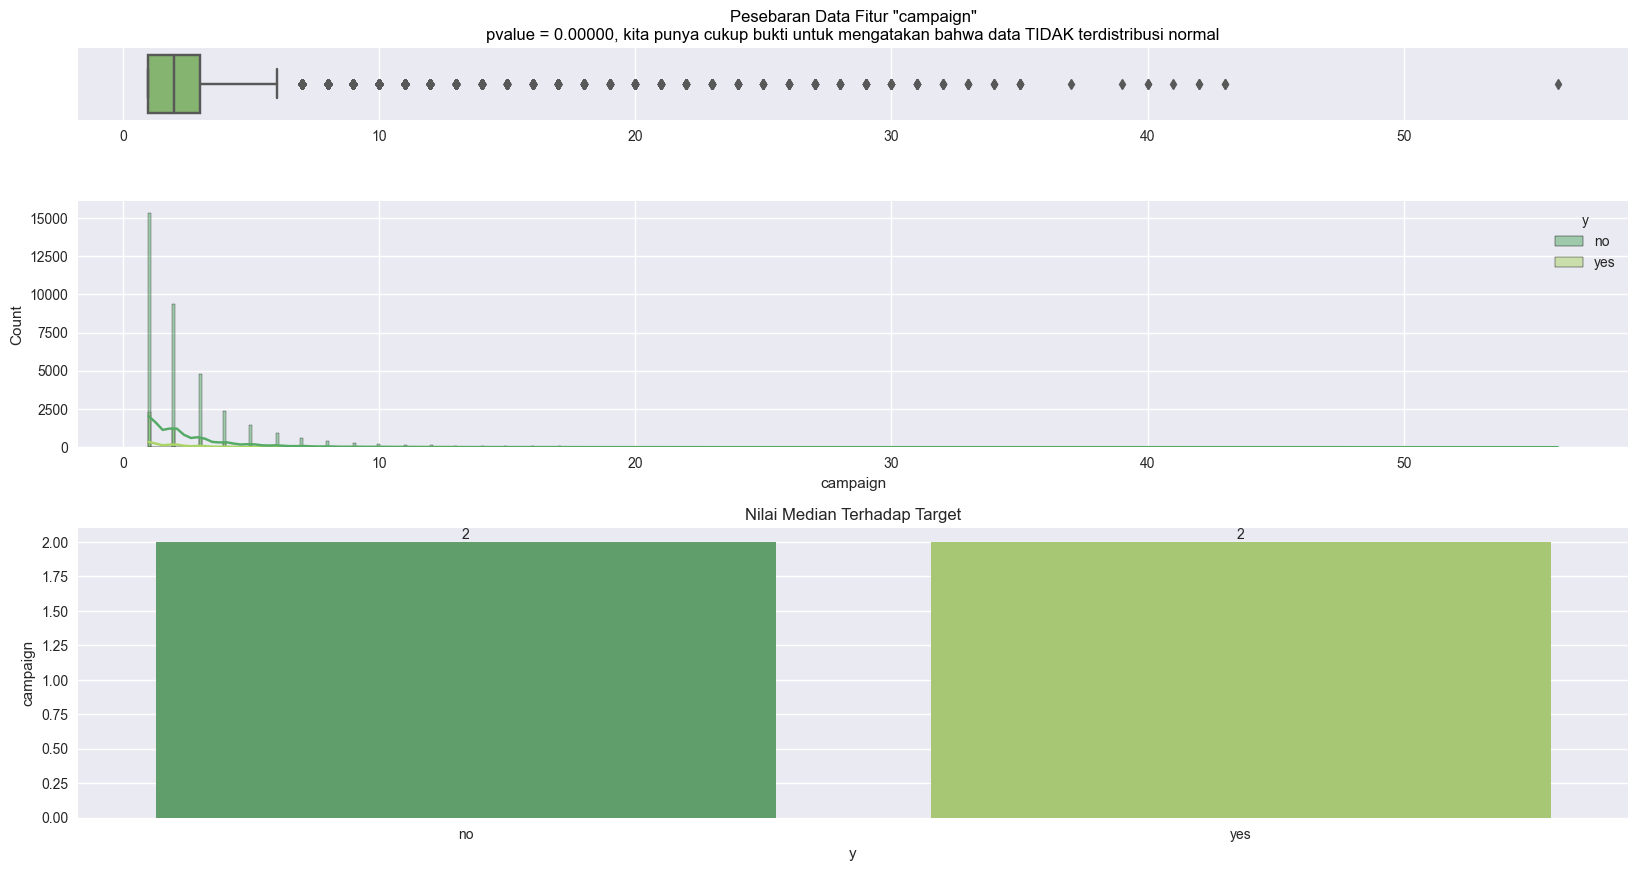

In [ ]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, ax = plt.subplots(3, 1, figsize = (20,10),
                       gridspec_kw={"height_ratios": (0.25, 0.85, 1),
                       "hspace": 0.4})

# Uji Normalitas Data
stat, pvalue = normaltest(df["campaign"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax[0].set_title(f"""Pesebaran Data Fitur "campaign"\n{distribusi}""", color = "black")
sns.boxplot(x = df["campaign"], ax = ax[0], palette="summer")
ax[0].set(xlabel = "")

sns.histplot(data = df, hue = 'y',x = df['campaign'], stat = 'count',
             ax = ax[1], kde = True, palette="summer")

ax[2].set_title('Nilai Median Terhadap Target')
sns.barplot(x = 'y', y = 'campaign', data = df, estimator=np.median, ci=0, 
                  ax=ax[2], palette="summer")
ax[2].bar_label(ax[2].containers[0],label_type='edge')

plt.show()

#### **Numerical variable**

##### **Numerikal Diskrit** (*age, campaign, pdays, previous*)

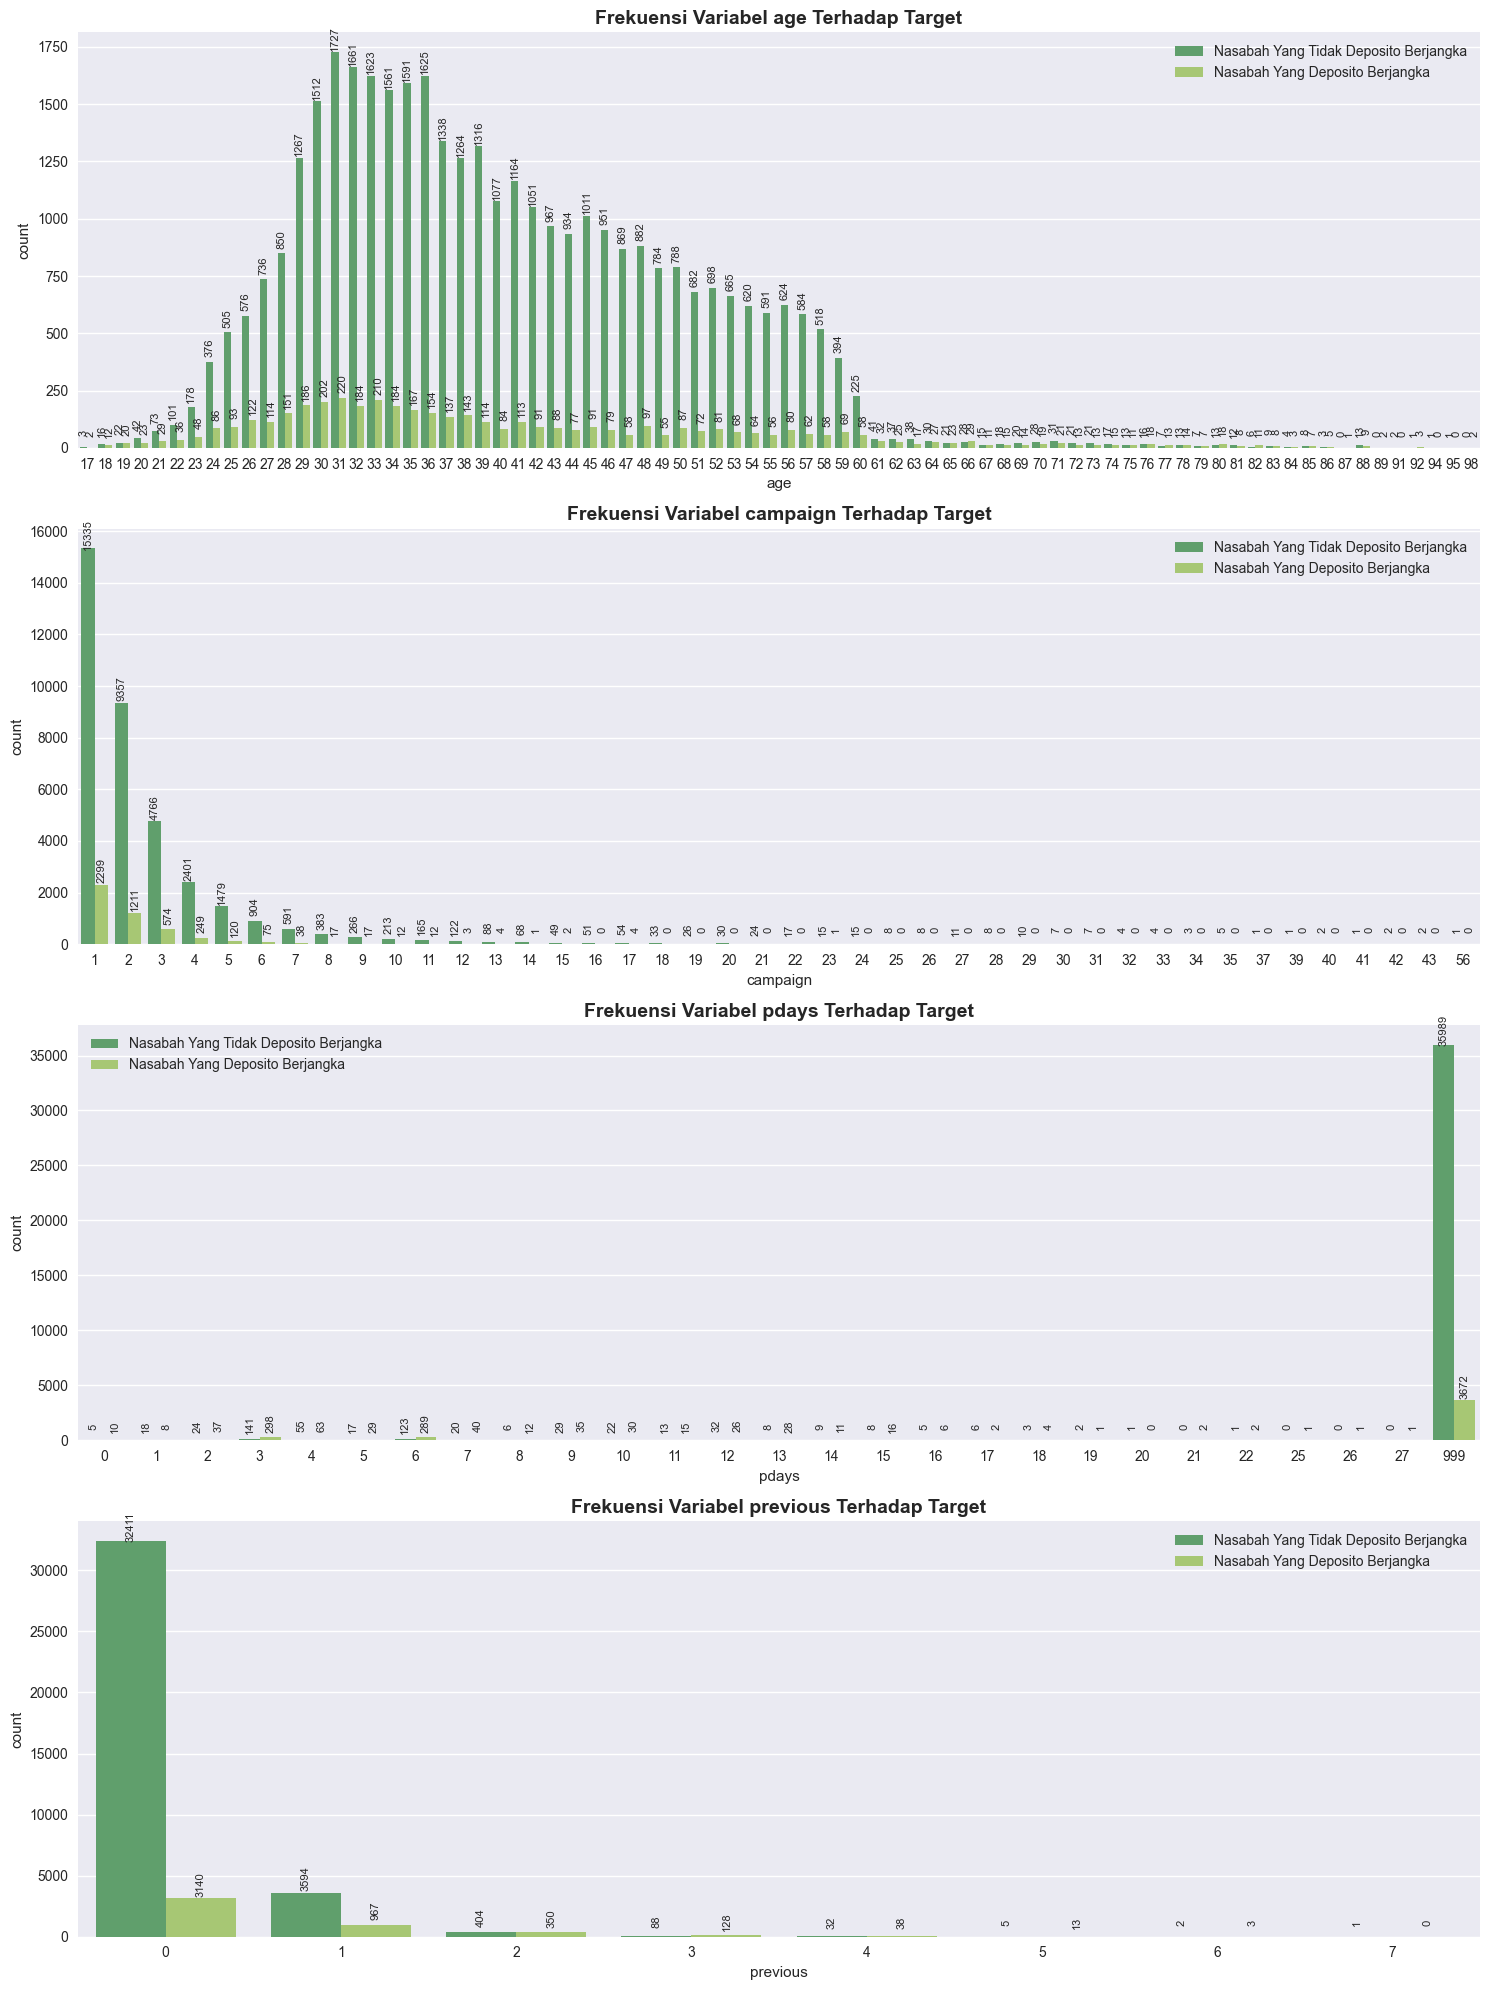

In [ ]:
# Cek variabel numerikal diskrit

diskrit = ["age", "campaign", "pdays", "previous"]

plt.figure(figsize=(15,20))
cmap = plt.get_cmap("summer")

a=1
for i in diskrit:
    plt.subplot(4,1,a)
    ax = sns.countplot(data=df, x=i, hue="y", palette="summer")
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Target", fontsize=14, weight="bold")
    a+=1
    # for p in ax.patches:
    #     percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
    #     x = p.get_x() + p.get_width() / 2
    #     y = p.get_height()
    #     ax.annotate(percentage, (x, y), ha='center', va='center', rotation=90, size=8,)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', rotation=90,
                    size=8,
                    xytext = (0, 10), 
                    textcoords = 'offset points')

plt.show()

__Insight :__
* Pada kolom ***NumberOfDeviceRegistered***, pelanggan dengan jumlah device terdaftar lebih dari 2 device cenderung akan *churn* (*diatas 4% dari total pelanggan*). Hal ini mungkin karena pelanggan memiliki banyak opsi e-commerce dan pelanggan tersebut dapat berpindah-pindah e-commerce
* Pada kolom ***NumberOfAddress***, pelanggan yang memiliki jumlah address 2 dan 3 akan cenderung churn (*diatas 4% dari total pelanggan*). Untuk jumlah address lebih dari 11, kemungkinan merupakan nilai outlier, maka perlu dianalisis kembali

##### **Numerikal Kontinyu** (*duration, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed*)

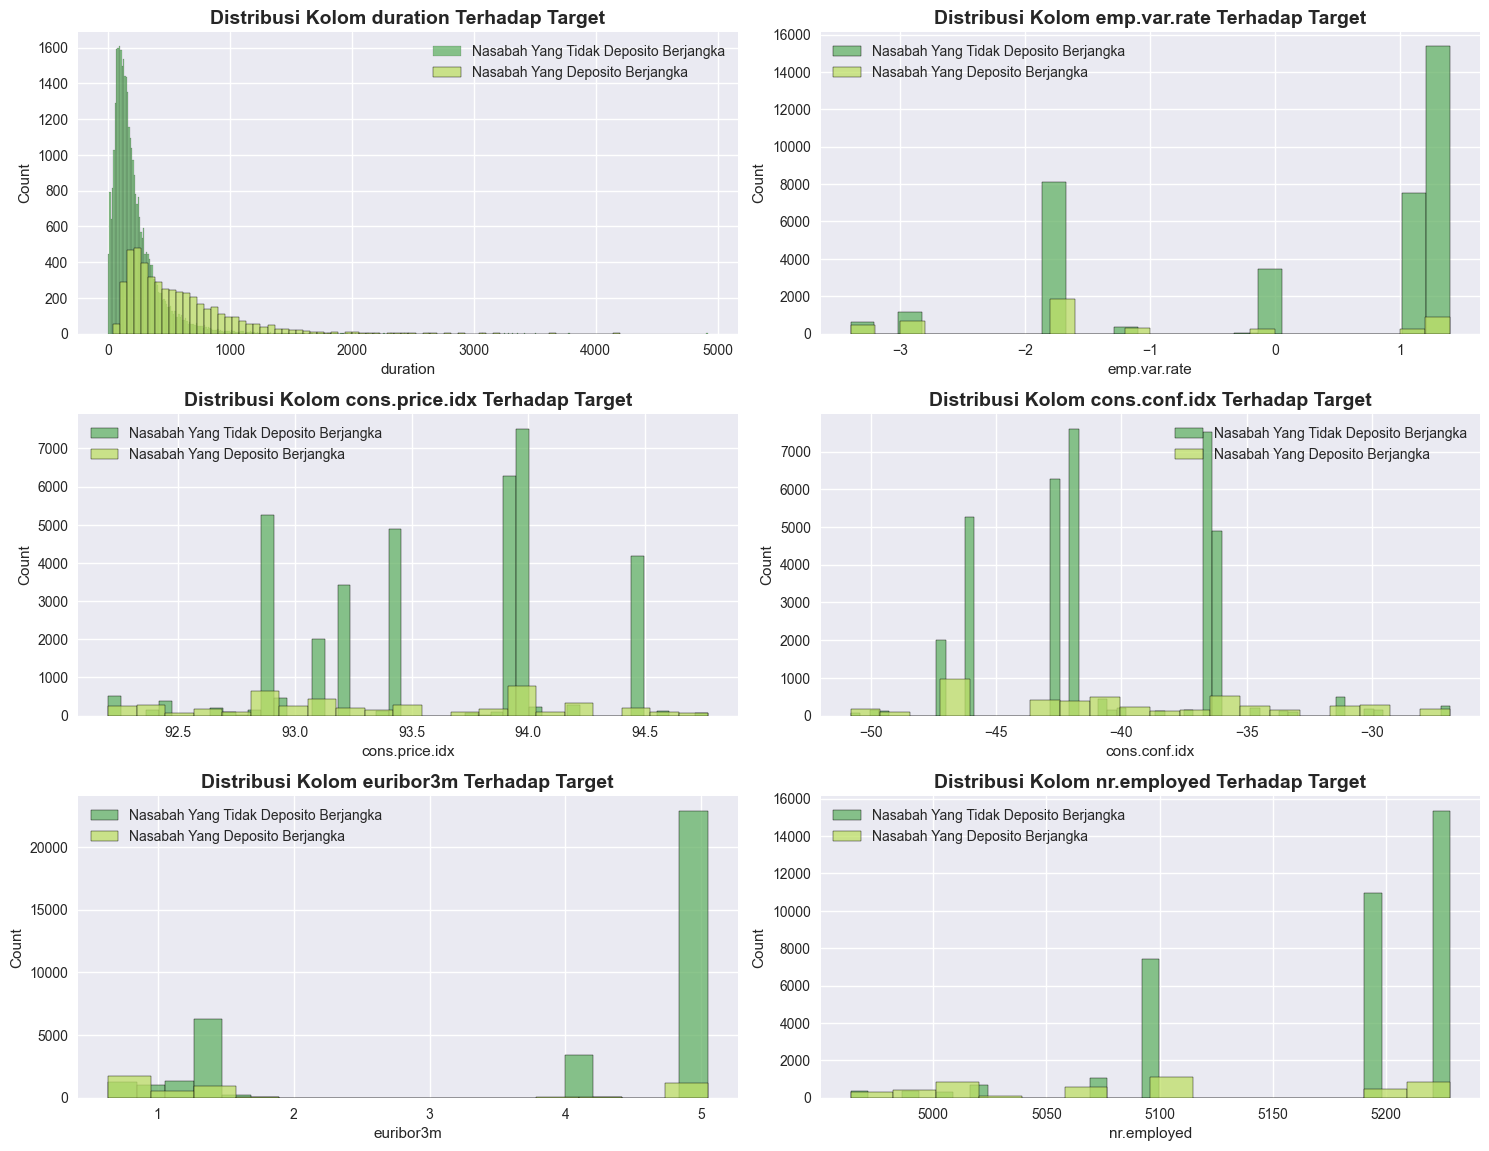

In [ ]:
# Cek variabel numerikal kontinyu

kontinu = ["duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

plt.figure(figsize=(15,15))
cmap = plt.get_cmap("summer")

a=1
for i in kontinu:
    plt.subplot(4,2,a)
    sns.histplot(x=df[df["y"]=="no"][i],color=cmap([100]))
    sns.histplot(x=df[df["y"]=="yes"][i],color=cmap([190]))
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.title(f"Distribusi Kolom {i} Terhadap Target", fontsize=14, weight='bold')
    a+=1

plt.show()

__Insight :__
* Pada kolom ***Tenure***, pelanggan churn terjadi pada awal bulan pemakaian yaitu di bulan ke-0 hingga bulan ke-2. Hal tersebut kemungkinan bisa terjadi dikarenakan pelanggan masih beradaptasi dengan platform e-commerce dan merasa tidak cocok dengan platform tersebut
* Pada kolom ***WarehouseToHome***, pelanggan dengan jarak gudang ke rumah kurang dari 20 mil cenderung churn. Hal tersebut mungkin dikarenakan ongkos kirim yang terlalu mahal untuk jarak yang dekat dengan rumah
* Pada kolom ***DaySinceLastOrder***, pelanggan terbanyak churn terjadi satu sampai dua hari setelah melakukan order. Hal tersebut mungkin terjadi dikarenakan pelanggan hanya membutuhkan barang dari e-commerce dan tidak tertarik dengan platform e-commerce tersebut
* Pada kolom ***CashbackAmount*** (nilai dibawah 100 dolar kemungkinan adalah nilai outlier), semakin rendah cashback yang diberikan maka semakin banyak pelanggan yang churn
* Pada **semua kolom numerikal kontinyu** pesebaran data tidak merata, hal ini terjadi karena terdapat rare label. Maka perlu dilakukan analisa kembali

#### **Categorical variable**

##### **Kategorikal Nominal `Target`** (*y*)

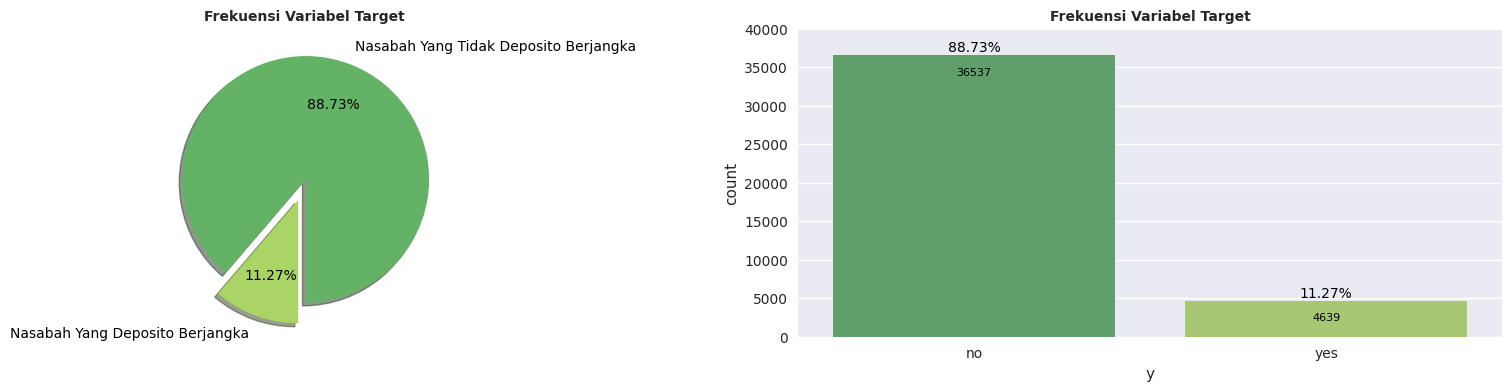

In [ ]:
# Melihat kategori Target

# Mengatur proporsi grafik
fig, axes = plt.subplots(1, 2, figsize=(20,4))
plt.style.use('default')
cmap = plt.get_cmap('summer')

# create pie chart
temp_df = df.y.value_counts(normalize=True) * 100
axes[0].pie(x=[temp_df.loc["no"], temp_df.loc["yes"]], labels=['Nasabah Yang Tidak Deposito Berjangka', 'Nasabah Yang Deposito Berjangka'], colors=cmap([100, 170]), autopct='%0.2f%%', 
        startangle=270, pctdistance=0.65, labeldistance=1.15, explode=(0.03, 0.15), shadow=True)
# set title
axes[0].set_title('Frekuensi Variabel Target', fontsize=10, weight='bold')

# create barplot
plt.title("Frekuensi Variabel Target", fontsize=10, weight='bold')
# set title dan 
ax = sns.countplot(data=df, x="y", palette="summer")
ax.set_ylim([0, 40000])
# annotation
for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center',
                    size=8,
                    xytext = (0, -12), 
                    textcoords = 'offset points')
                    

plt.show();

__Insight :__
* Jumlah nasabah yang **Menggunakan Term Deposit** (`yes`) sebanyak 4,640 (11.27%)
* Jumlah nasabah yang **Tidak Menggunakan Term Deposit** (`no`) sebanyak 36,548 (88.73%)
* Dari dataset terjadi ***Imbalance*** dengan kelas yang tidak menggunakan Term Deposit menjadi kelas mayoritas. Selanjutnya kita akan lakukan analisis mendalam

##### **Kategorikal Nominal** (*job, marital, default, housing, loan, contact, month, day_of_week, poutcome*)

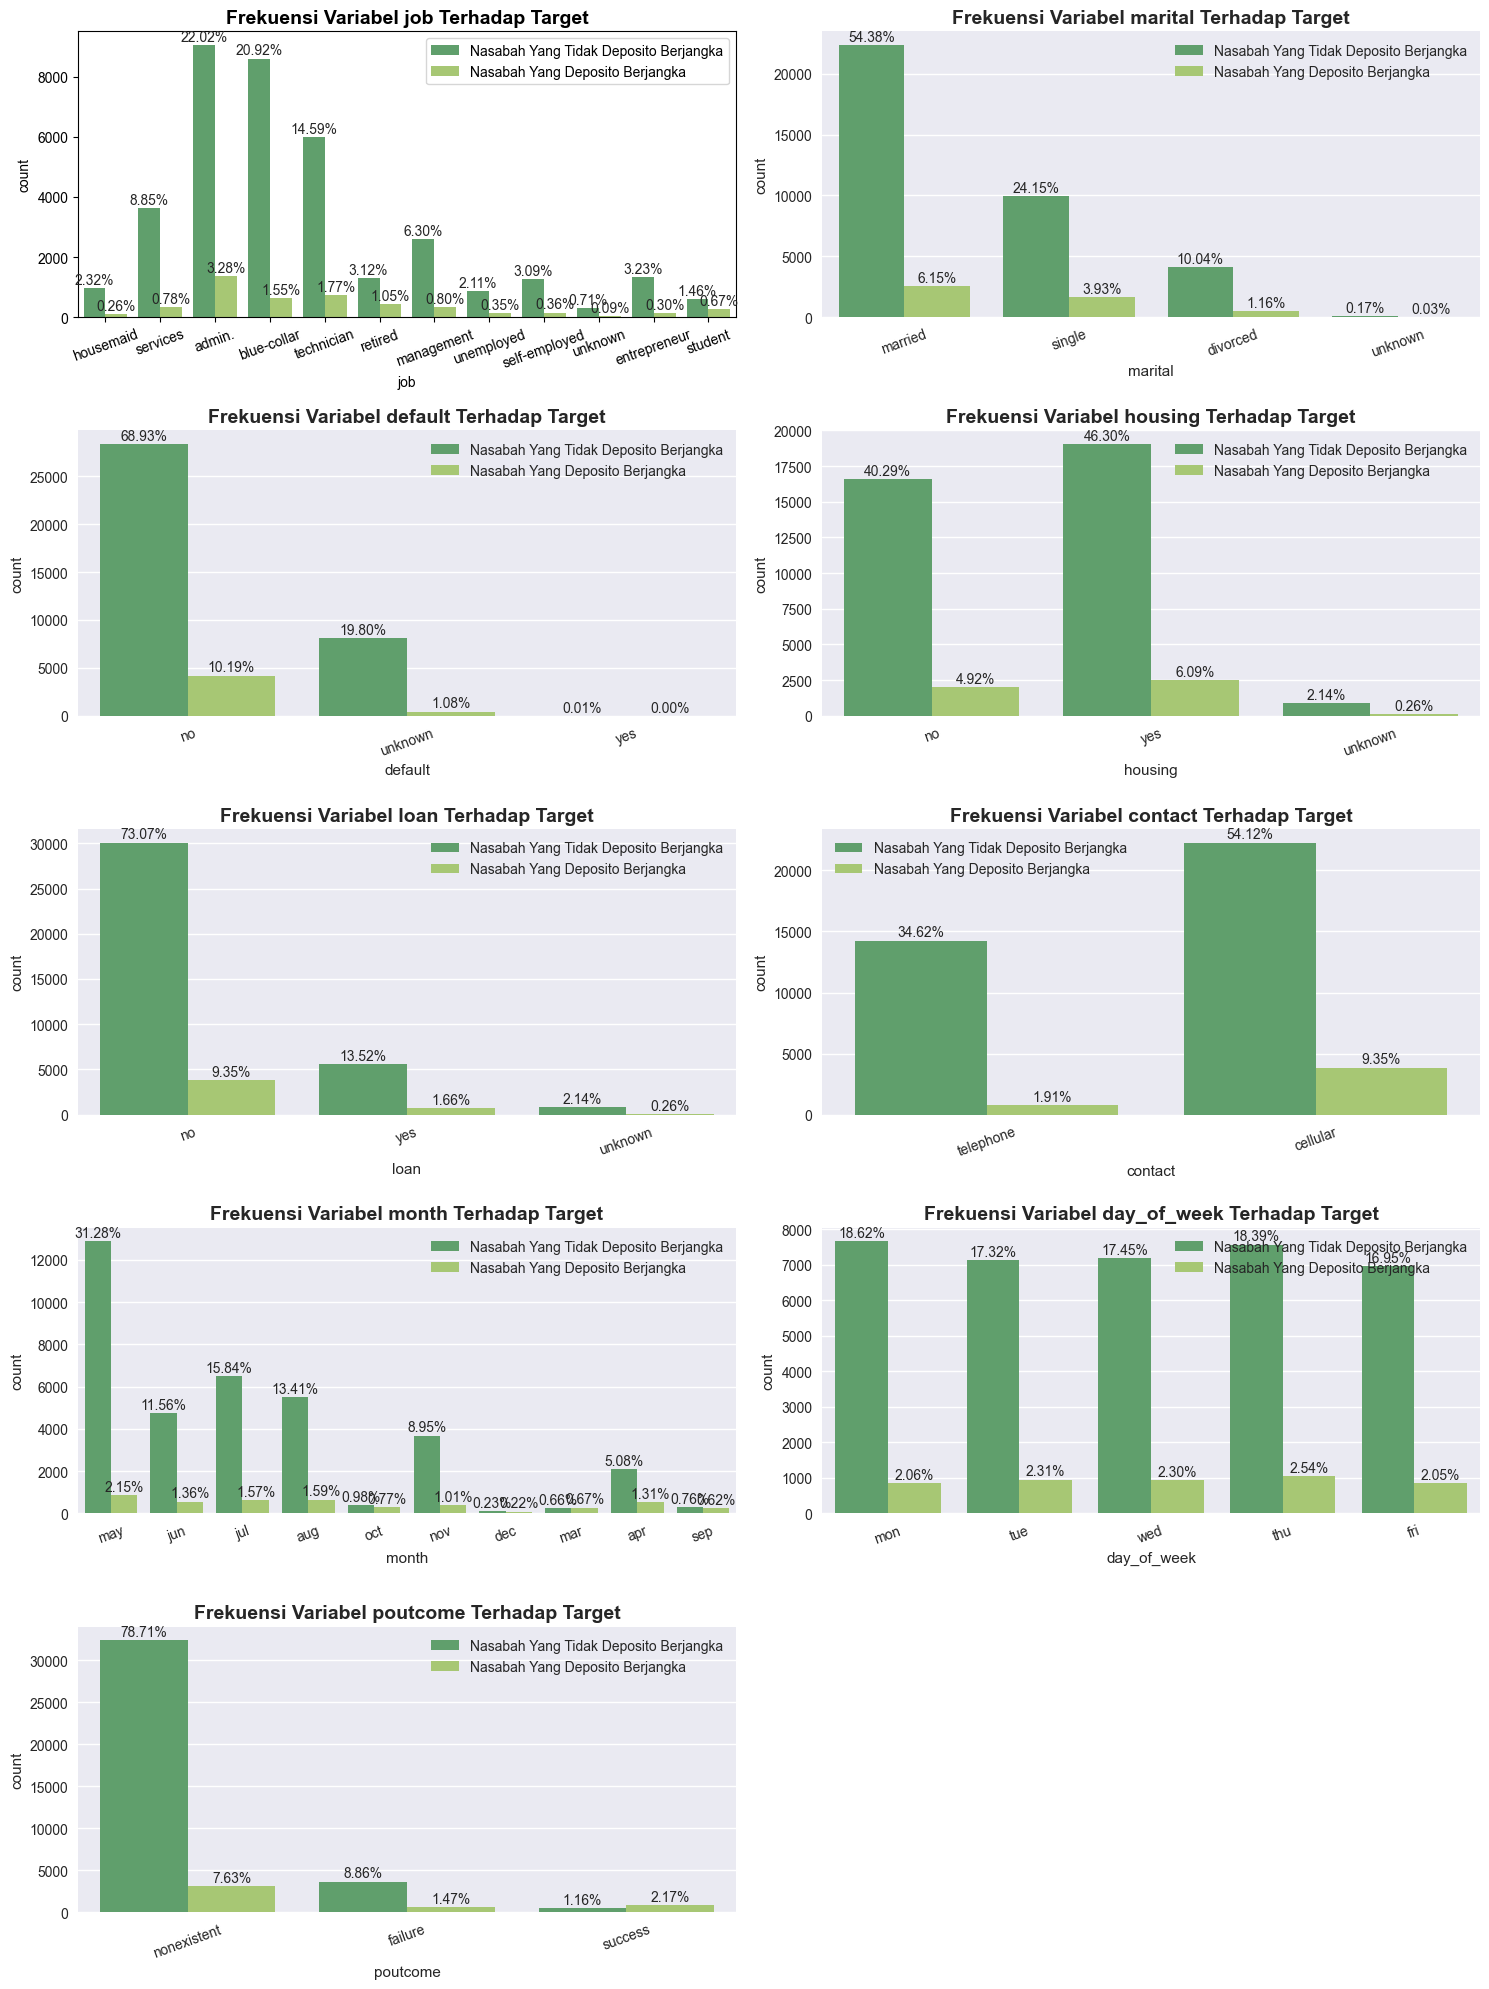

In [ ]:
# Cek variabel kategorikal nominal

nominal = ["job", "marital", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

plt.figure(figsize=(15,20))
cmap = plt.get_cmap("summer")

a=1
for i in nominal:
    plt.subplot(5,2,a)
    ax = sns.countplot(data=df, x=i, hue="y", palette="summer")
    ax.tick_params(axis='x', labelrotation=20)
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Target", fontsize=14, weight="bold")
    a+=1
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    # for p in ax.patches:
    #     ax.annotate(format(p.get_height(), '.0f'), 
    #                 (p.get_x() + p.get_width() / 2., p.get_height()), 
    #                 ha = 'center', va = 'center',
    #                 size=8,
    #                 xytext = (0, -5), 
    #                 textcoords = 'offset points')

plt.show()

__Insight :__
* Pada fitur ***`job`***, **admin** merupakan profesi dengan tingkat tertinggi dalam Berlangganan Deposito Berjangka maupun Tidak Berlangganan deposito berjangka. Hal ini disebabkan karena  jumlah nasabah yang bekerja sebagai admin lebih banyak dibandingkan dengan profesi lainnya.
* Pada fitur ***`marital`***, mayoritas nasabah ialah nasabah yang sudah menikah, diikuti oleh nasabah lajang, bercerai, dan unknown.
* Pada fitur ***`default`*** menunjukan apakah nasabah memiliki kredit macet atau tidak. Mayoritas nasabah tidak memiliki kredit macet, diikuti oleh kategori unknown, dan nasabah yang memiliki kredit macet.
* Pada fitur ***`housing`*** menunjukan apakah nasabah memiliki pinjaman rumah atau tidak. Mayoritas nasabah memiliki pinjaman rumah, diikuti oleh kategori tidak memiliki pinjaman rumah, dan kategori unknown.
* Pada fitur ***`loan`*** menunjukan apakah nasabah memiliki pinjaman bank atau tidak. Mayoritas nasabah tidak memiliki pinjaman bank, diikuti oleh nasabah yang memiliki pinjaman bank, dan kategori unknown.
* Pada fitur ***`contact`*** menunjukan apakah nasabah memiliki pinjaman bank atau tidak. Mayoritas nasabah tidak memiliki pinjaman bank, diikuti oleh nasabah yang memiliki pinjaman bank, dan kategori unknown.
* Pada fitur ***`month`*** menunjukan apakah nasabah memiliki pinjaman bank atau tidak. Mayoritas nasabah tidak memiliki pinjaman bank, diikuti oleh nasabah yang memiliki pinjaman bank, dan kategori unknown.
* Pada fitur ***`day_of_week`*** bisa dilihat bahwa masing-masing hari kerja memiliki distribusi yang sama baik nasabah yang menggunakan term deposit atau yang tidak. Nasabah yang tidak menggunakan term deposit berkisar 17%-18%, dan untuk nasabah yang menggunakan term deposit berkisar antara 2.0%-2.5%. Hal ini menandakan bahwa fitur day_of_week tidak akan terlalu membantu dalam memprediksi variabel target, karena semua hari memiliki distribusi yang sama.
* Pada fitur ***`poutcome`*** menunjukan hasil dari campaign sebelumnya. kategori terbanyak dari hasil kampanye pemasaran sebelumnya ialah nonexistent (tidak ada). Artinya, sebagian besar nasabah merupakan nasabah baru yang belum pernah mendapatkan campaign sebelumnya. Yang perlu diperhatikan disini adalah, kategori dengan hasil yang success dari kampanye sebelumnya, sebagian besar dari nasabah tersebut memang berlangganan deposito berjangka. Hal ini terlihat dari 2,17% Berlangganan Deposito Berjangka dan 1,16% Tidak Berlangganan Deposito Berjangka. Dari sini, kita dapat membuat asumsi, bahwa fitur ini mungkin memiliki beberapa nilai dalam memprediksi variabel target. khususnya kategori poutcome_success.

##### **Kategorikal Ordinal** (*education*)

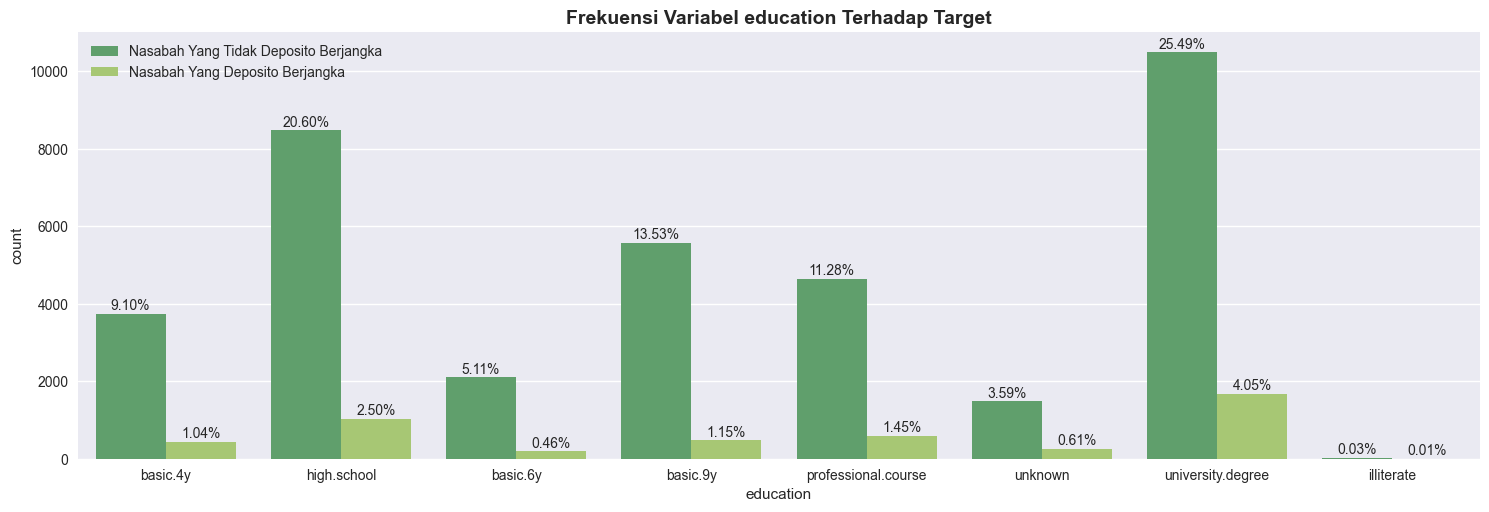

In [ ]:
# Cek variabel kategorikal ordinal

ordinal = ["education"]

plt.figure(figsize=(15,5))
cmap = plt.get_cmap("summer")

a=1
for i in ordinal:
    plt.subplot(1,1,a)
    ax = sns.countplot(data=df, x=i, hue="y", palette="summer")
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Target", fontsize=14, weight="bold")
    a+=1
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    # for p in ax.patches:
    #     ax.annotate(format(p.get_height(), '.0f'), 
    #                 (p.get_x() + p.get_width() / 2., p.get_height()), 
    #                 ha = 'center', va = 'center',
    #                 size=8,
    #                 xytext = (0, -12), 
    #                 textcoords = 'offset points')
        
plt.show()

__Insight :__
* Pada fitur ***education***, 

<Figure size 1500x2000 with 0 Axes>

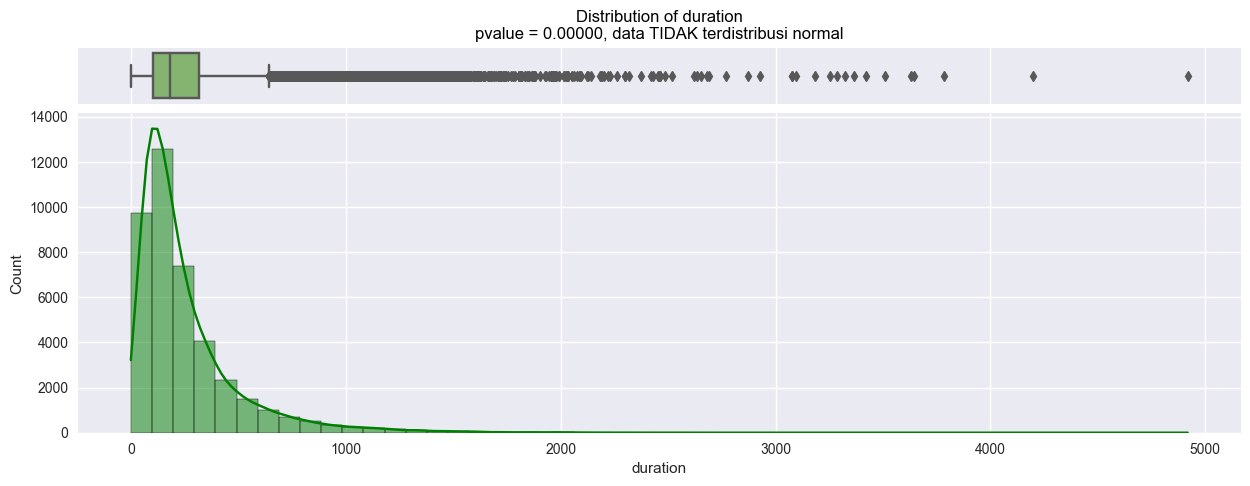

In [ ]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

stat, pvalue = normaltest(df["duration"].dropna())

if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

ax1.set_title(f"Distribution of duration\n{distribusi}", color = "black")
sns.boxplot(x = df["duration"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["duration"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()